In [1]:
import os
import subprocess
import tifffile
import scanpy as sc
import pandas as pd
import numpy as np
from skimage.morphology import binary_erosion, remove_small_objects, binary_dilation
from skimage.measure import regionprops_table
from scipy.ndimage import binary_fill_holes
from pathlib import Path

import matplotlib.pyplot as plt
from mip.utils import listfiles, extract_ome_tiff

In [2]:
from skimage.filters import gaussian

In [3]:
def generate_initial_mask(img, thresh=.0005, sigma=10.):
    f = gaussian(img, sigma=10.)
#     sns.displot(np.random.choice(img.flatten(), size=5000))
#     plt.show()
    
    mask = f > thresh
    mask = binary_fill_holes(mask)
    
    return mask, f

In [4]:
def generate_duct_mask(region_mask, n_erosions=40):
    for i in range(n_erosions):
        mask = binary_erosion(mask)
    mask = binary_fill_holes(mask)
    return mask

#### Angelo

###### make ome.tiffs

In [238]:
out_dir = '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/'
Path(out_dir).mkdir(parents=True, exist_ok=True)

In [240]:
fps = sorted(listfiles(
    '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/',
    regex=r'TIFs$'))
fps

['/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2203_pt1072_31606/TIFs',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2204_pt1071_31605/TIFs',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2206_pt1116_31620/TIFs',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2302_pt1046_20671/TIFs',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2303_pt1047_20672/TIFs',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2304_pt1089_20677/TIFs',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2305_pt2000_20689_Normal/TIFs',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Dat

In [241]:
commands = []
for fp in fps:
    sample = fp.split('/')[-2]
    command = ' '.join([
        'mip', 'make-ome',
        '--input-tif', fp,
        '--output-filepath', os.path.join(out_dir, f'{sample}.ome.tiff'),
        '--platform', 'raw'
    ])
    commands.append(command)
commands

['mip make-ome --input-tif /diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2203_pt1072_31606/TIFs --output-filepath /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2203_pt1072_31606.ome.tiff --platform raw',
 'mip make-ome --input-tif /diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2204_pt1071_31605/TIFs --output-filepath /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2204_pt1071_31605.ome.tiff --platform raw',
 'mip make-ome --input-tif /diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2206_pt1116_31620/TIFs --output-filepath /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2206_pt1116_31620.ome.tiff --platform raw',
 'mip make-ome --input-tif /diskmnt/Proj

In [243]:
for i, command in enumerate(commands):
    if i % 5 == 0: print(i)
    subprocess.check_output(command, shell=True)

0


2022-12-22 08:58:44,061 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2203_pt1072_31606.ome.tiff
2022-12-22 08:58:51,421 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2204_pt1071_31605.ome.tiff
2022-12-22 08:58:58,648 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2206_pt1116_31620.ome.tiff
2022-12-22 08:59:07,804 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2302_pt1046_20671.ome.tiff
2022-12-22 08:59:16,439 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2303_pt1047_20672.ome.tiff


5


2022-12-22 08:59:23,466 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2304_pt1089_20677.ome.tiff
2022-12-22 08:59:30,951 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2305_pt2000_20689_Normal.ome.tiff
2022-12-22 08:59:38,516 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2306_pt1092_20691.ome.tiff
2022-12-22 08:59:45,460 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2307_pt2001_20680_Normal.ome.tiff
2022-12-22 08:59:52,908 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2309_pt1039_20694.ome.tiff


10


2022-12-22 09:00:00,607 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2310_pt1052_20696.ome.tiff
2022-12-22 09:00:08,004 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2311_pt1053_20698.ome.tiff
2022-12-22 09:00:15,338 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2312_pt1064_20700.ome.tiff
2022-12-22 09:00:22,848 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2313_pt1094_20702.ome.tiff
2022-12-22 09:00:30,006 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2314_pt2002_20703_Normal.ome.tiff


15


2022-12-22 09:00:37,285 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2318_pt1054_20706.ome.tiff
2022-12-22 09:00:45,802 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2319_pt1041_20705.ome.tiff
2022-12-22 09:00:54,064 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2320_pt1042_20716.ome.tiff
2022-12-22 09:01:00,968 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2321_pt1043_20717.ome.tiff
2022-12-22 09:01:09,157 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2322_pt1057_20718.ome.tiff


20


2022-12-22 09:01:17,160 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2324_pt2003_20721_Normal.ome.tiff
2022-12-22 09:01:25,288 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2325_pt1461_20726.ome.tiff
2022-12-22 09:01:33,863 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2326_pt1101_20736.ome.tiff
2022-12-22 09:01:41,549 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2327_pt1100_20735.ome.tiff
2022-12-22 09:01:48,828 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2328_pt1099_20734.ome.tiff


25


2022-12-22 09:01:57,572 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point2331_pt1105_30985.ome.tiff
2022-12-22 09:02:04,531 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3102_pt1157_31646.ome.tiff
2022-12-22 09:02:12,421 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3104_pt1175_31649.ome.tiff
2022-12-22 09:02:20,522 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3105_pt1173_31661.ome.tiff
2022-12-22 09:02:29,253 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3107_pt1188_31663.ome.tiff


30


2022-12-22 09:02:36,218 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3108_pt1189_31664.ome.tiff
2022-12-22 09:02:43,496 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3109_pt2004_31653_Normal.ome.tiff
2022-12-22 09:02:51,008 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3110_pt1078_31655.ome.tiff
2022-12-22 09:02:58,774 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3111_pt1119_31659.ome.tiff
2022-12-22 09:03:06,827 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3112_pt1165_31672.ome.tiff


35


2022-12-22 09:03:14,459 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3114_pt1081_31667.ome.tiff
2022-12-22 09:03:21,824 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3115_pt1080_31666.ome.tiff
2022-12-22 09:03:29,295 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3117_pt1082_31677.ome.tiff
2022-12-22 09:03:37,973 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3119_pt1166_31684.ome.tiff
2022-12-22 09:03:46,160 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3120_pt1177_31685.ome.tiff


40


2022-12-22 09:03:53,878 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3121_pt1211_31686.ome.tiff
2022-12-22 09:04:01,215 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3123_pt1162_31688.ome.tiff
2022-12-22 09:04:09,771 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3125_pt1167_31695.ome.tiff
2022-12-22 09:04:17,749 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3128_pt1085_31690.ome.tiff
2022-12-22 09:04:25,641 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3129_pt1084_31689.ome.tiff


45


2022-12-22 09:04:32,545 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point3201_31724_Tonsil.ome.tiff
2022-12-22 09:04:40,393 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4102_pt2005_30990_Normal.ome.tiff
2022-12-22 09:04:47,645 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4103_pt1173_30993.ome.tiff
2022-12-22 09:04:54,564 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4106_pt1162_30997.ome.tiff
2022-12-22 09:05:02,200 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4114_pt2006_31801_Normal.ome.tiff


50


2022-12-22 09:05:09,405 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4115_pt1107_31817.ome.tiff
2022-12-22 09:05:17,971 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4116_pt1065_31821.ome.tiff
2022-12-22 09:05:25,649 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4117_pt1143_31822.ome.tiff
2022-12-22 09:05:33,513 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4118_pt2007_31824_Normal.ome.tiff
2022-12-22 09:05:41,111 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4120_pt1153_31832.ome.tiff


55


2022-12-22 09:05:48,634 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4127_pt1052_31842.ome.tiff
2022-12-22 09:05:55,718 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4128_pt1064_31843.ome.tiff
2022-12-22 09:06:03,631 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4130_pt1057_31848.ome.tiff
2022-12-22 09:06:10,778 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4132_pt1026_31856.ome.tiff
2022-12-22 09:06:17,603 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4133_pt1027_31855.ome.tiff


60


2022-12-22 09:06:26,230 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4136_pt1058_31850.ome.tiff
2022-12-22 09:06:34,591 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4142_pt2008_Normal.ome.tiff
2022-12-22 09:06:41,285 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4410_pt1181_31721.ome.tiff
2022-12-22 09:06:48,988 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point4411_pt1180_31720.ome.tiff
2022-12-22 09:06:57,787 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point5202_pt1279_20662.ome.tiff


65


2022-12-22 09:07:06,191 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point5302_pt1070_31594.ome.tiff
2022-12-22 09:07:12,880 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point5303_pt1153_31614.ome.tiff
2022-12-22 09:07:19,381 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point5304_pt1152_31613.ome.tiff
2022-12-22 09:07:28,013 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point5305_pt1117_31627.ome.tiff
2022-12-22 09:07:36,044 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point5306_pt1132_31624.ome.tiff


70


2022-12-22 09:07:44,995 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point5308_pt1074_31629.ome.tiff
2022-12-22 09:07:52,868 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point5309_pt1134_31636.ome.tiff
2022-12-22 09:08:00,431 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point5310_pt1174_31638.ome.tiff
2022-12-22 09:08:09,373 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point5311_31640_Tonsil.ome.tiff
2022-12-22 09:08:17,546 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point6102_pt1019_20648.ome.tiff


75


2022-12-22 09:08:26,498 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point6103_pt1008_20624.ome.tiff
2022-12-22 09:08:33,742 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point6201_pt1027_20597.ome.tiff
2022-12-22 09:08:42,196 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point6202_pt1027_20594.ome.tiff
2022-12-22 09:08:50,751 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point6203_pt1107_31568.ome.tiff
2022-12-22 09:08:58,010 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point6204_pt1145_31580.ome.tiff


80


2022-12-22 09:09:04,912 - ome.tiff written to /diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/ome_tiffs/Point6206_pt1197_31571.ome.tiff


###### make initial region masks

In [234]:
out_dir = '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_initial/'
Path(out_dir).mkdir(parents=True, exist_ok=True)

In [183]:
fps = sorted(listfiles(
    '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/',
    regex=r'PanKRT.tif'))
fps

['/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2203_pt1072_31606/TIFs/PanKRT.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2204_pt1071_31605/TIFs/PanKRT.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2206_pt1116_31620/TIFs/PanKRT.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2302_pt1046_20671/TIFs/PanKRT.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2303_pt1047_20672/TIFs/PanKRT.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2304_pt1089_20677/TIFs/PanKRT.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2305_pt2000_20689_Normal/TIFs/PanKRT.tif',
 '/dis

In [235]:
for fp in fps:
    root_dir = '/'.join(fp.split('/')[:-2])
    sample = fp.split('/')[-3]
    img = tifffile.imread(fp)
    mask, _ = generate_initial_mask(img, thresh=.0005, sigma=10.)
    tifffile.imsave(os.path.join(out_dir, f'{sample}.tif'), mask)

#### make final region mask from manually filled

In [36]:
out_dir = '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_final/'
Path(out_dir).mkdir(parents=True, exist_ok=True)

In [37]:
fps = sorted(listfiles(
    '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_filled/',
    regex=r'.tif$'))
fps

['/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_filled/Point2203_pt1072_31606.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_filled/Point2204_pt1071_31605.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_filled/Point2206_pt1116_31620.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_filled/Point2302_pt1046_20671.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_filled/Point2303_pt1047_20672.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_filled/Point2304_pt1089_20677.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_filled/Point2305_pt2000_20689_Normal.tif',
 '/diskmnt/Pr

In [38]:
erosion_dist = 40
for fp in fps:
    postfix = fp.split('/')[-1]
    mask = tifffile.imread(fp)
    for i in range(erosion_dist):
        mask = binary_erosion(mask)
    mask = binary_fill_holes(mask)
    tifffile.imsave(os.path.join(out_dir, postfix), mask)

#### make feature adata object

In [272]:
df =  pd.read_csv(
    '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Single_Cell_Data/Single_Cell_Data.csv',
)
df

event  Point_Num  CohortNumber  cell_size      COLI  CD14       P63  \
0      70001       2203             3   0.761562  0.000000   0.0  0.000000   
1      70003       2203             3   0.838842  0.000000   0.0  0.000000   
2      70006       2203             3   0.729244  0.000000   0.0  0.617415   
3      70007       2203             3   0.726701  0.000000   0.0  0.000000   
4      70008       2203             3   0.640285  0.000000   0.0  0.000000   
...      ...        ...           ...        ...       ...   ...       ...   
69667  38134       6206           161   0.562149  0.265940   0.0  0.000000   
69668  38137       6206           161   0.398084  0.000000   0.0  0.000000   
69669  38148       6206           161   0.433114  0.000000   0.0  0.000000   
69670  38169       6206           161   0.544144  0.631799   0.0  0.000000   
69671  38178       6206           161   0.605845  0.629398   0.0  0.000000   

       Background       pS6        Ta  ...  Neighbor_dist_CD8T  \
0        0.678031  0.638869  0.571577  ...            0.052632   
1        0.684127  0.716979  0.441150  ...            0.000000   
2        0.639245  0.000000  0.816389  ...            0.000000   
3        0.657200  0.664403  0.545218  ...            0.000000   
4        0.683288  0.923153  0.511968  ...            0.000000   
...           ...       ...       ...  ...                 ...   
69667    0.685558  0.000000  0.591055  ...            0.000000   
69668    0.764095  0.000000  0.892533  ...            0.041667   
69669    0.662494  0.605838  0.941229  ...            0.227270   
69670    0.799027  0.000000  0.777088  ...            0.100000   
69671    0.764398  0.000000  0.746239  ...            0.000000   

       Neighbor_dist_CD4T  Neighbor_dist_BCELL  Neighbor_dist_TCELL  \
0                0.000000                  0.0             0.000000   
1                0.000000                  0.0             0.000000   
2                0.000000                  0.0             0.000000   
3                0.000000                  0.0             0.000000   
4                0.000000                  0.0             0.000000   
...                   ...                  ...                  ...   
69667            0.000000                  0.0             0.000000   
69668            0.041667                  0.0             0.083333   
69669            0.000000                  0.0             0.045455   
69670            0.000000                  0.0             0.000000   
69671            0.000000                  0.0             0.000000   

       Neighbor_dist_NEUT  Neighbor_dist_IMMUNEOTHER  K10_cluster  \
0                   0.000                   0.000000            8   
1                   0.000                   0.000000            2   
2                   0.000                   0.000000            2   
3                   0.000                   0.000000            2   
4                   0.000                   0.000000            8   
...                   ...                        ...          ...   
69667               0.000                   0.000000           10   
69668               0.000                   0.041667           10   
69669               0.000                   0.090909           10   
69670               0.000                   0.000000           10   
69671               0.125                   0.125000            5   

       duct_edge_mask  duct_mid_mask  duct_core_mask  
0                   0              0               0  
1                   1              0               0  
2                   0              1               0  
3                   0              1               0  
4                   1              0               0  
...               ...            ...             ...  
69667               0              0               0  
69668               0              0               0  
69669               0              0               0  
69670               0              0         

In [283]:
len(set(df['Point_Num']))

79

In [273]:
list(df.columns)

['event',
 'Point_Num',
 'CohortNumber',
 'cell_size',
 'COLI',
 'CD14',
 'P63',
 'Background',
 'pS6',
 'Ta',
 'CD4',
 'Au',
 'HLADRDPDQ',
 'ECADKRTCD45',
 'Nuc',
 'GZMB',
 'ECADKRTCD45GLUT1CD44',
 'Tryptase',
 'ECAD',
 'ECADKRTCD45GLUT1',
 'AR',
 'GLUT1',
 'MPO',
 'VIM',
 'CD3',
 'SMA',
 'CD56',
 'PanKRT',
 'CD11c',
 'HER2',
 'CD68',
 'P',
 'CK7',
 'CD8',
 'Na',
 'C',
 'PD1',
 'CD44',
 'HIF1a',
 'CD45',
 'X140empty',
 'FAP',
 'PDL1',
 'MMP9',
 'Ki67',
 'CK5',
 'COX2',
 'CD20',
 'FOXP3',
 'IDO1',
 'CD36',
 'ECADKRT',
 'HH3',
 'ER',
 'Ca40',
 'CD31',
 'CK5norm',
 'label',
 'area',
 'eccentricity',
 'major_axis_length',
 'minor_axis_length',
 'perimeter',
 'Tissue_Type',
 'Status',
 'Tissue',
 'sublineage',
 'phenotype',
 'compartment',
 'celllineage',
 'sublineage_code',
 'phenotype_code',
 'compartment_code',
 'celllineage_code',
 'manual_gating_cellineage',
 'manual_gating_subineage',
 'manual_gating_phenotype',
 'innerduct_mask',
 'distal_mask',
 'stroma_mask',
 'periph_mask',
 'epi

In [274]:
list(zip(*np.unique(df['phenotype'], return_counts=True)))

[('APC', 1680),
 ('BCELL', 388),
 ('CAF', 1315),
 ('CD4T', 1212),
 ('CD8T', 840),
 ('DC', 267),
 ('ENDO', 2219),
 ('FIBRO_VIMonly', 3704),
 ('IMMUNEOTHER', 991),
 ('MACS', 1023),
 ('MAST', 766),
 ('MONO', 2290),
 ('MONODC', 378),
 ('MYOEP', 4635),
 ('MYOFIBRO', 1479),
 ('NEUT', 476),
 ('NORMFIBRO', 889),
 ('OTHER', 4445),
 ('TCELL', 304),
 ('TUMOR_CK5', 2527),
 ('TUMOR_ECADCK', 13711),
 ('TUMOR_EMT', 1104),
 ('TUMOR_LUMINAL', 23029)]

In [275]:
fps = sorted(listfiles('/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/Segmetation_Outlines_and_Labels_Mendeley',
                       regex=r'labels.tiff$'))
fps


['/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/Segmetation_Outlines_and_Labels_Mendeley/Point2203_labels.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/Segmetation_Outlines_and_Labels_Mendeley/Point2204_labels.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/Segmetation_Outlines_and_Labels_Mendeley/Point2206_labels.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/Segmetation_Outlines_and_Labels_Mendeley/Point2302_labels.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/Segmetation_Outlines_and_Labels_Mendeley/Point2303_labels.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/Segmetation_Outlines_and_Labels_Mendeley/Point2304_labels.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/Segmetation_Out

In [292]:
out_dir = '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/spatial_features/'
Path(out_dir).mkdir(parents=True, exist_ok=True)

# props = None
for fp in fps:
    pt = fp.split('/')[-1].split('_')[0].replace('Point', '')
    img = tifffile.imread(fp)
    props = pd.DataFrame(regionprops_table(img, properties=('label', 'centroid'))).set_index('label')
    props.columns = ['y', 'x']
    props.index.name = 'label'
    
    f = df[df['Point_Num']==int(pt)]
    f = f.set_index('label')
    props['cell_type'] = f.loc[props.index.to_list(), 'phenotype']
    props['x'], props['y'] = [int(x) for x in props['x']], [int(x) for x in props['y']]
    props = props[['x', 'y', 'cell_type']]
    props.to_csv(os.path.join(out_dir, f'Point{pt}.txt'), sep='\t')

## inhouse codex

In [5]:
out_dir = '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v2/preprocessing/htan/'
Path(out_dir).mkdir(parents=True, exist_ok=True)

#### make spatial features

In [9]:
adata_fps = sorted(listfiles('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/',
                         regex='level_4/.*h5ad$'))
adata_fps = [fp for fp in adata_fps
             if '.ome.tiff' not in fp
             if 'cell_annotation' not in fp
             if 'metacluster' not in fp
             if 'spatial_features' not in fp]
adata_fps

['/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/021323_BRCA_HT365B1_S1H1/level_4/HT365B1_S1H1_02132023.h5ad',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/021723_BCRA_HT271B1_S1H3A5/level_4/HT271B1_S1H3A5_02172023.h5ad',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/031623_BRCA_HT397B1-U2/level_4/HT397B1_U2_03162023.h5ad',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/03172023_BRCA_HT397B1-U12/level_4/HT397B1_U12_03172023.h5ad',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/040623_BRCA_HT397B1-U31/level_4/HT397B1_S1H1A3U31_04062023.h5ad',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/041223_BRCA_HT397B1-S1H3A1-U22/level_4/HT397B1_S1H1A3U22_04122023.h5ad',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/041923_BRCA_HT171B1-S1H9A1-4_top_HT243B1-S1H4A4_HT271B1-S1H6A5_HT308B1-S1H5A4_btm/level_4/HT243B1-S1H4A4_04192023.h5ad',
 '/diskmnt/Projects/Users/estorrs/mul

In [10]:
a = sc.read_h5ad(adata_fps[0])
a

AnnData object with n_obs × n_vars = 124083 × 23
    obs: 'row', 'col', 'bbox-r1', 'bbox-c1', 'bbox-r2', 'bbox-c2', 'area', 'DAPI_intensity', 'CD8_intensity', 'Her2_intensity', 'GATA3 (D)_intensity', 'cKit_intensity', 'Pan-Cytokeratin_intensity', 'GLUT1_intensity', 'Podoplanin_intensity', 'CK17_intensity', 'HLA-DR_intensity', 'CK14_intensity', 'FOXP3_intensity', 'MGP_intensity', 'CD20_intensity', 'SMA_intensity', 'CD68_intensity', 'Ki67_intensity', 'Vimentin_intensity', 'CD3e_intensity', 'PR_intensity', 'CD45_intensity', 'ER_intensity', 'CK19_intensity', 'cell_type'
    uns: 'gating_strategy', 'thresholds'
    obsm: 'spatial'

In [11]:
sample_to_feats = {}
for fp in adata_fps:
    sample_id = fp.split('/')[-1].replace('.h5ad', '')
    a = sc.read_h5ad(fp)
    feats = a.obs[['col', 'row', 'cell_type']]
    feats.columns = ['x', 'y', 'cell_type']
    feats.index.name = 'cell_id'
    sample_to_feats[sample_id] = feats
    

In [12]:
for s in sample_to_feats.keys(): print(s)

HT365B1_S1H1_02132023
HT271B1_S1H3A5_02172023
HT397B1_U2_03162023
HT397B1_U12_03172023
HT397B1_S1H1A3U31_04062023
HT397B1_S1H1A3U22_04122023
HT243B1-S1H4A4_04192023
HT271B1-S1H6A5_04192023
HT308B1-S1H5A4_04192023
HT565B1-H2_04262023
HT171B1-S1H9A1-4_left_05122023
HT171B1-S1H9A1-4_right_05122023
HT243B1-S1H4A4_left_05122023
HT243B1-S1H4A4_right_05122023
HT271B1-S1H6A5_left_05122023
HT271B1-S1H6A5_right_05122023
HT308B1-S1H5A4_left_05122023
HT308B1-S1H5A4_right_05122023
HT206B1_H1
HT206B1_S1H2L4_20221028
HT206B1_H1_06252022
HT110B1_S1H4
HT243B1_S1H4
HT305B1_S1H1
HT297B1_H1_08042022
HT323B1_H1_08042022
HT323B1_H1A1
HT323B1_H1A4
HT323B1_H3
HT339B1_H1A1
HT339B1_H2A1
HT339B1_H4A4
HT397B1_H2A2
HT397B1_H3A1
HT480B1_S1H2_R001
HT480B1_S1H2_R002


In [13]:
out = os.path.join(out_dir, 'spatial_features')
Path(out).mkdir(parents=True, exist_ok=True)
for s, feats in sample_to_feats.items():
    feats.to_csv(os.path.join(out, f'{s}.txt'), sep='\t')

#### make initial region masks

In [17]:
ome_fps = sorted(listfiles('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/',
                         regex='/level_2/[^/]+.ome.tiff$'))
# ome_fps = [fp for fp in ome_fps if any([s in fp for s in sample_to_feats.keys()])]
ome_fps

['/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/021323_BRCA_HT365B1_S1H1/level_2/HT365B1_S1H1.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/021723_BCRA_HT271B1_S1H3A5/level_2/HT271B1_S1H3A5.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/031623_BRCA_HT397B1-U2/level_2/HT397B1_U2_03162023.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/03172023_BRCA_HT397B1-U12/level_2/HT397B1_U12_03172023.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/040623_BRCA_HT397B1-U31/level_2/HT397B1_S1H1A3U31_04062023.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/041223_BRCA_HT397B1-S1H3A1-U22/level_2/HT397B1_S1H1A3U22_04122023.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/041923_BRCA_HT171B1-S1H9A1-4_top_HT243B1-S1H4A4_HT271B1-S1H6A5_HT308B1-S1H5A4_btm/level_2/HT171B1-S1H9A1-4_04192023.ome.tiff',
 '/diskmnt/Projects/Users

In [20]:
sample_to_thresh = {
    'HT206B1-H1': .01,
    'HT206B1_H1_06252022': .01,
    'HT323B1-H1A1': .01,
    'HT323B1-H1A4': .01,
    'HT323B1-H3': .01,
    'HT397B1-H2A2': .002,
    'HT397B1-H3A1': .002,
}

In [25]:
for fp in ome_fps:
    print(fp)
    channel_to_img = extract_ome_tiff(fp)
    print(sorted(channel_to_img.keys()))
    del(channel_to_img)

/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1-H1/level_2/HT206B1-H1.ome.tiff
['CD11c', 'CD163', 'CD20', 'CD3', 'CD31', 'CD36', 'CD4', 'CD44', 'CD45RA', 'CD45RO', 'CD68', 'CD8', 'CK14', 'CK19', 'DAPI', 'E-cadherin', 'Foxp3', 'GATA3', 'GLUT1', 'HIF1a', 'HLA-DR', 'Histone H3 Pho', 'Ki67', 'MGP', 'MMP9', 'Maspin', 'Pan-CK', 'Podoplanin', 'SMA', 'Vimentin']
/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_2/HT206B1_H1_06252022.ome.tiff
['CD11c', 'CD163', 'CD20', 'CD31', 'CD36', 'CD3e', 'CD4', 'CD68', 'CD8', 'CK14', 'CK17', 'CK19', 'DAPI', 'E-cadherin', 'ER', 'FGFR3', 'Foxp3', 'GATA3', 'GLUT1', 'HLA-DR', 'Histone H3 Pho', 'Ki67', 'MGP', 'PR', 'Pan-CK', 'Podoplanin', 'SMA', 'Vimentin', 'cKIT']
/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT323B1-H1A1/level_2/HT323B1-H1A1.ome.tiff
['CD11c', 'CD163', 'CD20', 'CD31', 'CD36', 'CD3e', 'CD4', 'CD44', 'CD45RA', 'CD45RO', 'CD68', 'CD8', 'CK14', 'CK17', 'CK19', 'DAPI', 

In [22]:
out = os.path.join(out_dir, 'region_mask_initial')
Path(out).mkdir(parents=True, exist_ok=True)
for fp in ome_fps:
    sample = fp.split('/')[-1].replace('.ome.tiff', '')
    print(sample)
    channel_to_img = extract_ome_tiff(fp, ['Pan-CK'])
    assert len(channel_to_img)==1
    img = channel_to_img['Pan-CK']
    mask, _ = generate_initial_mask(img, thresh=sample_to_thresh[sample], sigma=10.)
    plt.imshow(mask)
    plt.show()
    tifffile.imsave(os.path.join(out, f'{sample}.tif'), mask)
    tifffile.imsave(os.path.join(out, f'{sample}_panck.tif'), img)

HT206B1-H1
HT206B1_H1_06252022
HT323B1-H1A1
HT323B1-H1A4
HT323B1-H3
HT397B1-H2A2
HT397B1-H3A1


#### make final masks

In [40]:
fps = sorted(listfiles(
    os.path.join(out_dir, 'region_mask_filled'),
    regex=r'.tif$'))
fps

['/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/htan/region_mask_filled/HT206B1-H1.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/htan/region_mask_filled/HT206B1_H1_06252022.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/htan/region_mask_filled/HT323B1-H1A1.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/htan/region_mask_filled/HT323B1-H1A4.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/htan/region_mask_filled/HT323B1-H3.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/htan/region_mask_filled/HT397B1-H2A2.tif',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/htan/region_mask_filled/HT397B1-H3A1.tif']

In [41]:
erosion_dist = 40
out = os.path.join(out_dir, 'region_mask_final')
Path(out).mkdir(parents=True, exist_ok=True)

for fp in fps:
    sample = fp.split('/')[-1].replace('.tif', '')
    print(sample)
    mask = tifffile.imread(fp)
    for i in range(erosion_dist):
        mask = binary_erosion(mask)
    mask = binary_fill_holes(mask)
    tifffile.imsave(os.path.join(out, f'{sample}.tif'), mask)

HT206B1-H1
HT206B1_H1_06252022
HT323B1-H1A1
HT323B1-H1A4
HT323B1-H3
HT397B1-H2A2
HT397B1-H3A1


#### sandbox

In [245]:
fps = sorted(listfiles(
    '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/',
    regex=r'.ome.tiff'))
fps

['/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/20221118_BRCA_HT271B1_S1H3A5_HT171B1_S1H1A1-A4/level_2/HT271B1-S1H3A5_HT171B1-S1H1A1-A4_20221118.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/20221122_BRCA_HT171B1_S1H1A1/level_2/HT171B1_S1H8A1_20221122.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/20221202_BRCA_HT271B1_S1H3A5_HT171B1_S1H1A1-A4/level_2/HT272_171_20221202.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/20221205_BRCA_HT171B1_S1H1A4/level_2/HT171B1_20221205.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1-H1/level_2/HT206B1-H1.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1-H1/level_3/mcmicro/registration/HT206B1-H1.ome.tiff',
 '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1-S1H2L4_LRG_HT427P1_S1H1A3_SML_20221028/level_2/HT206B1-S1H2L4_LRG_HT427P1_S1H1A3_SML_20221028.ome.tiff',

In [246]:
fps = [
    '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_2/HT206B1_H1_06252022.ome.tiff'
]

In [269]:
m = None
i = None
for fp in fps:
    sample = fp.split('/')[-1].replace('.ome.tiff', '')
    channel_to_img = extract_ome_tiff(fp, channels=['Pan-CK'])
    img = channel_to_img['Pan-CK']
    mask, i = generate_initial_mask(img, thresh=.005, sigma=10.)
    m = mask
    tifffile.imsave(os.path.join(out_dir, f'{sample}.tif'), mask)

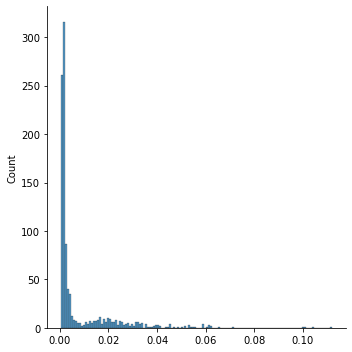

In [263]:
sns.displot(np.random.choice(i[i<10000].flatten(), size=1000))

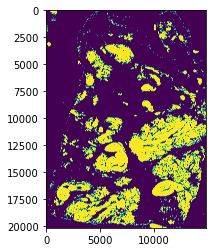

In [265]:
plt.imshow(i > .005)

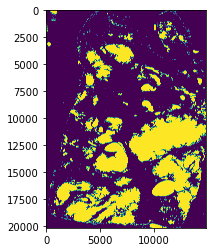

In [270]:
plt.imshow(m)

#### sandbox

In [303]:
fps = sorted(listfiles(
    '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/brca_dcis_v1/preprocessing/angelo/region_mask_final',
    regex=r'.tif'))

duct_fps = sorted(listfiles(
    '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/',
    regex=r'duct_mask.tif'))

epi_fps = sorted(listfiles(
    '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/',
    regex=r'myoep.*.tif'))


angelo


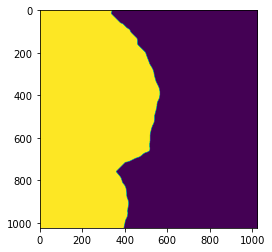

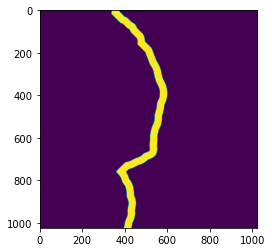

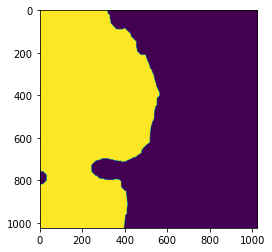

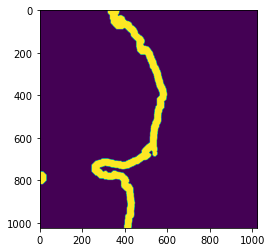

angelo


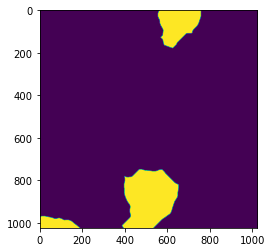

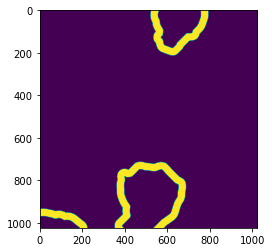

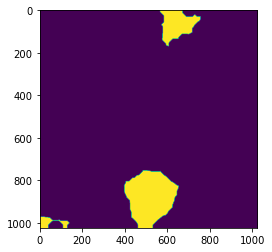

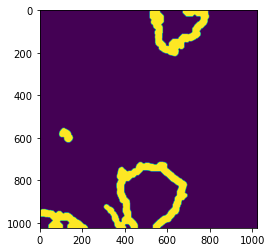

angelo


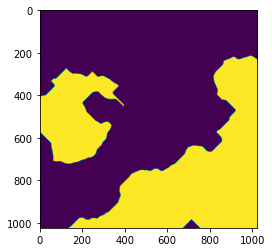

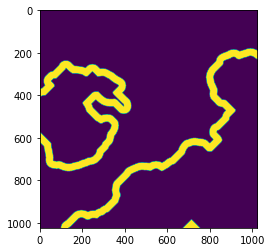

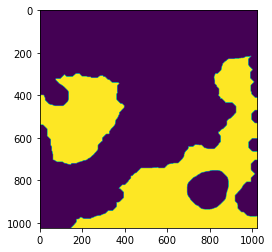

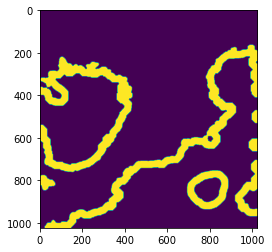

angelo


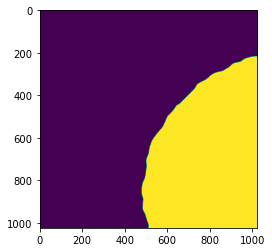

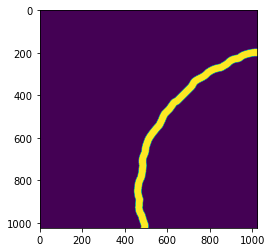

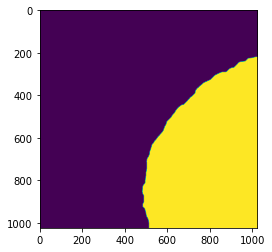

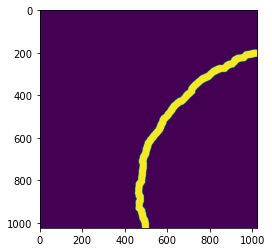

angelo


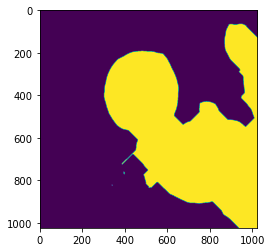

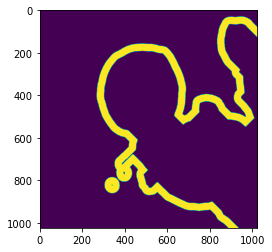

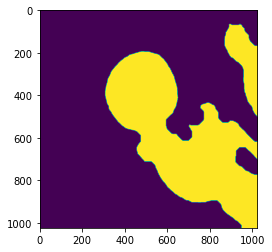

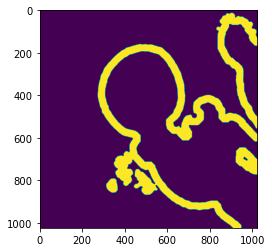

angelo


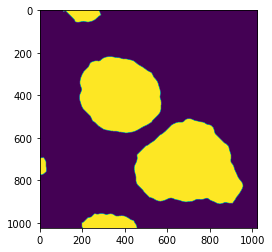

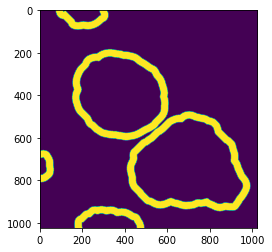

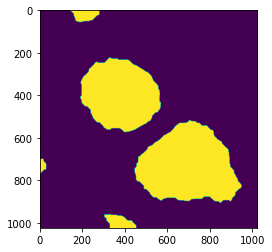

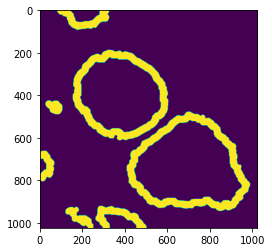

angelo


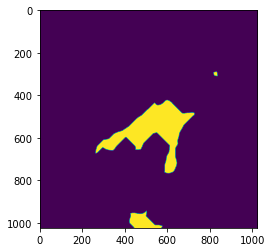

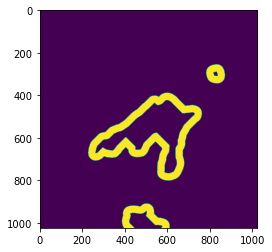

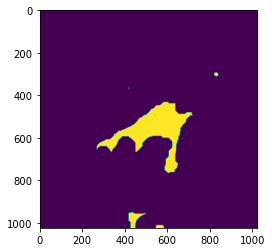

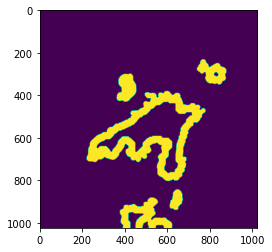

angelo


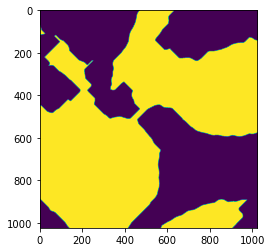

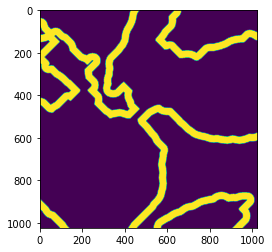

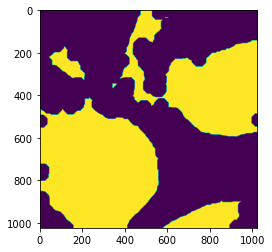

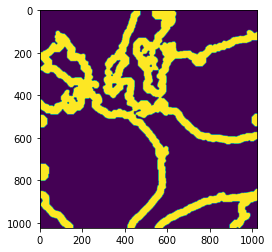

angelo


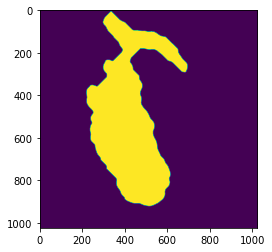

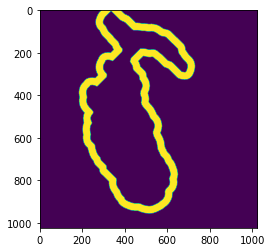

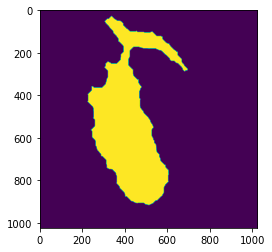

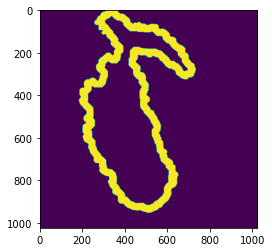

angelo


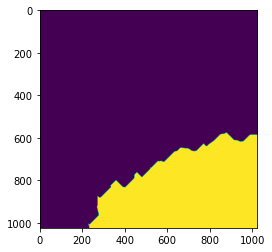

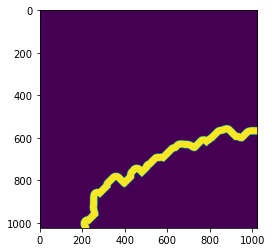

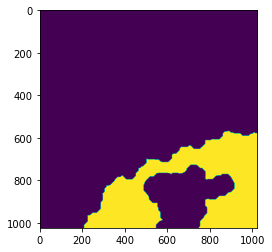

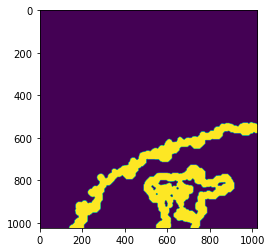

angelo


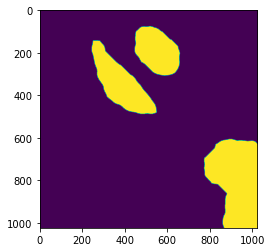

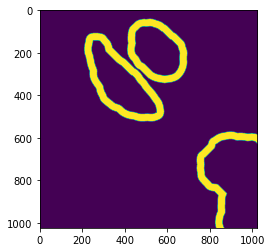

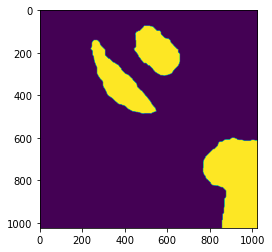

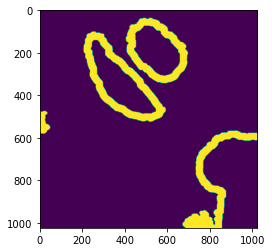

angelo


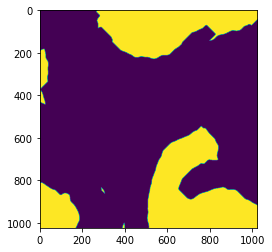

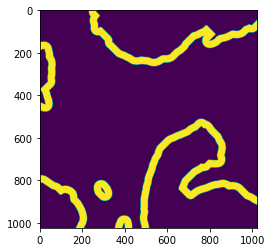

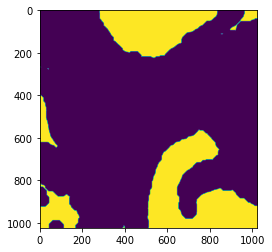

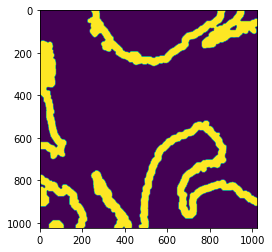

angelo


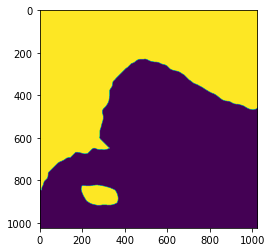

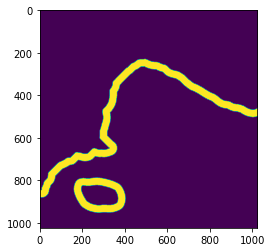

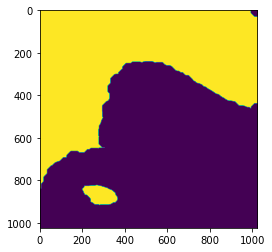

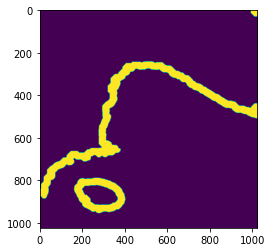

angelo


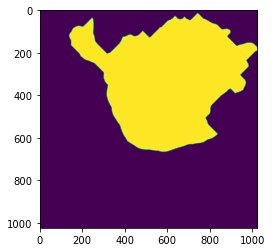

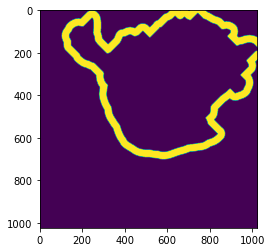

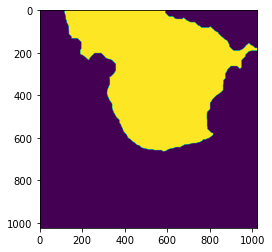

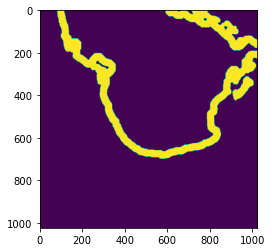

angelo


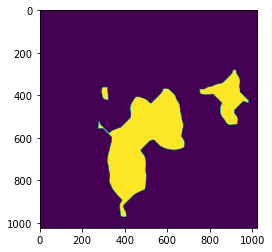

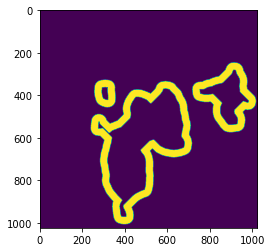

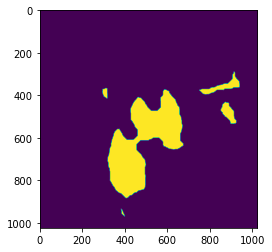

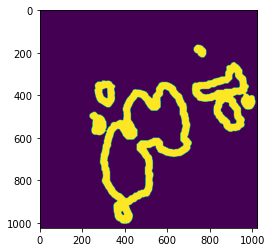

angelo


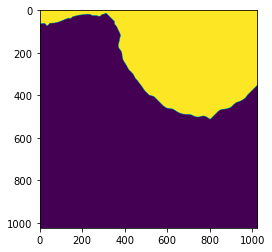

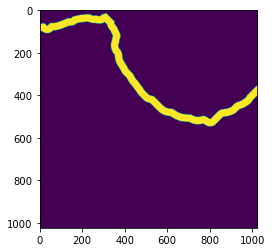

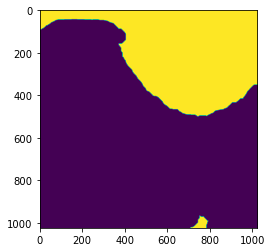

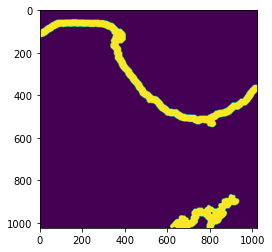

angelo


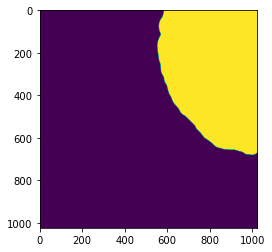

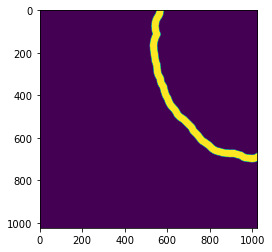

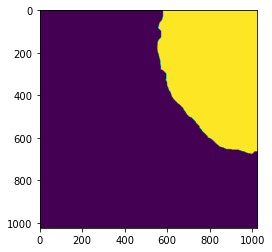

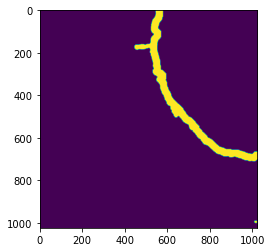

angelo


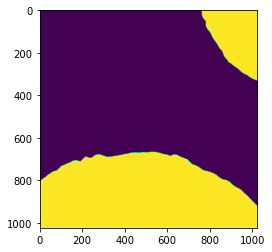

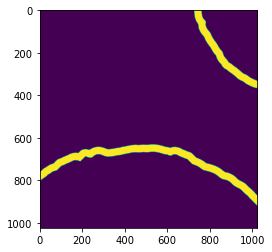

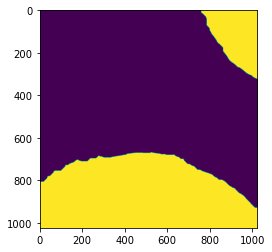

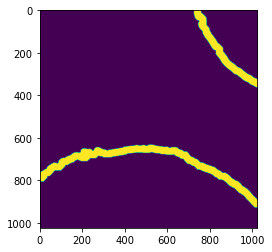

angelo


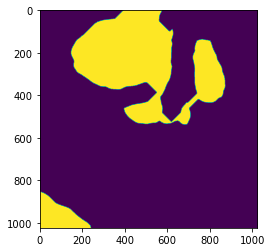

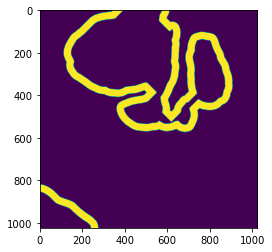

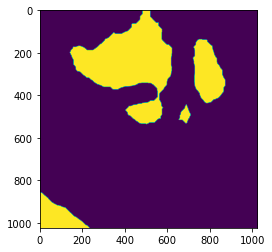

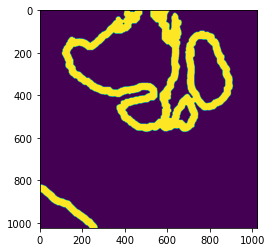

angelo


KeyboardInterrupt: 

In [307]:
from skimage.morphology import label
from skimage.segmentation import expand_labels
for fp, duct_fp, epi_fp in zip(fps, duct_fps, epi_fps):
    print(fp.split('/')[-3])
    img = tifffile.imread(fp)
    plt.imshow(img)
    plt.show()
    
    labeled = label(img)
    outer = expand_labels(labeled, distance=35)
    outer_mask = outer > 0
    ring = outer_mask ^ img
    plt.imshow(ring)
    plt.show()
    
    mask = np.asarray(Image.open(duct_fp))
    plt.imshow(mask)
    plt.show()
    
    mask = np.asarray(Image.open(epi_fp))
    plt.imshow(mask)
    plt.show()

In [224]:
# mask_fps = sorted(listfiles(
#     '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/',
#     regex=r'duct_mask.tif'))
# mask_fps

Point2203_pt1072_31606


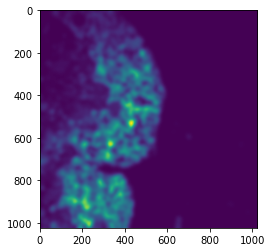

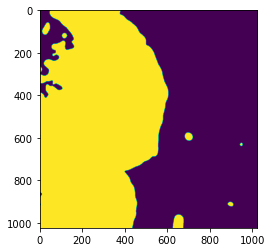

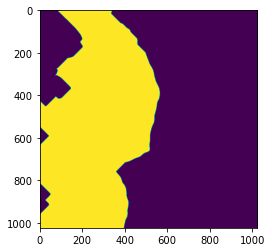

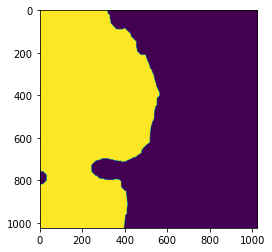

Point2204_pt1071_31605


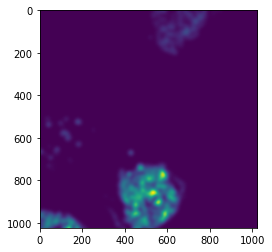

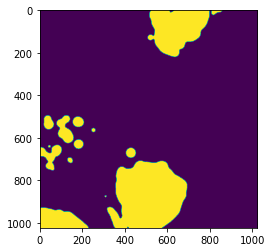

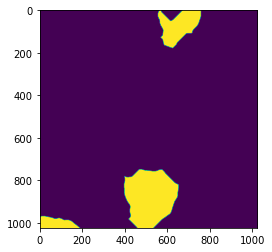

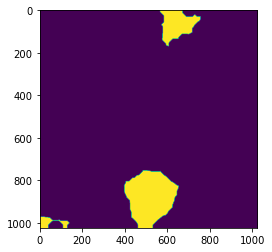

Point2206_pt1116_31620


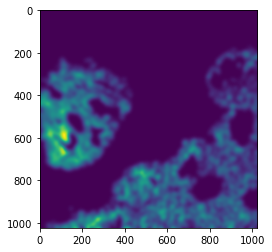

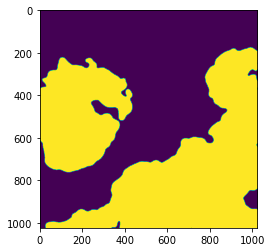

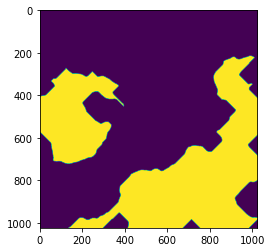

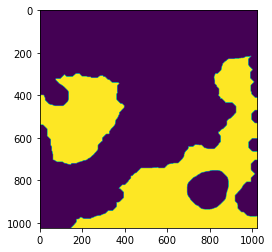

Point2302_pt1046_20671


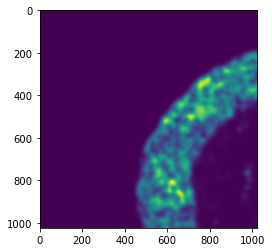

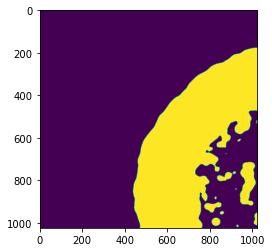

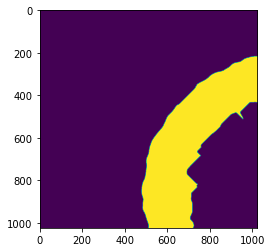

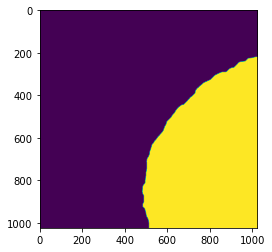

Point2303_pt1047_20672


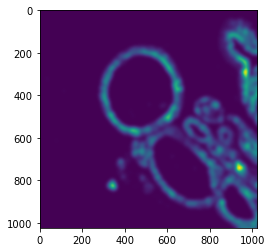

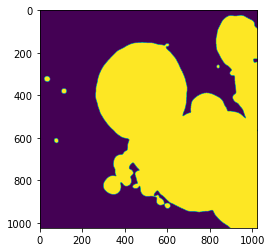

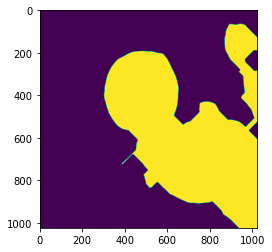

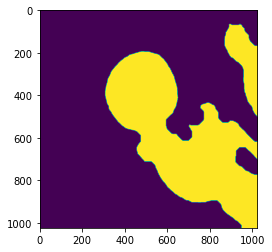

Point2304_pt1089_20677


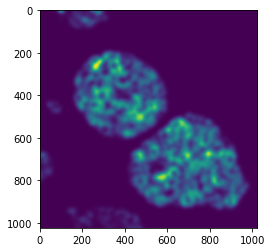

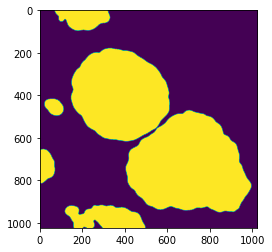

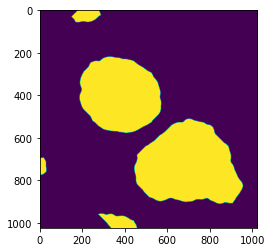

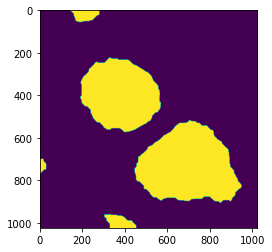

Point2305_pt2000_20689_Normal


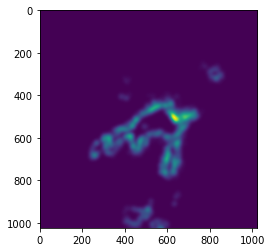

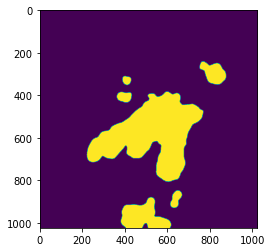

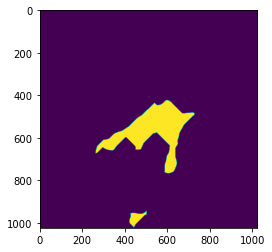

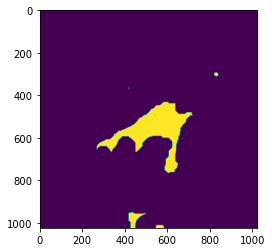

Point2306_pt1092_20691


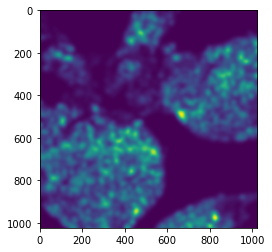

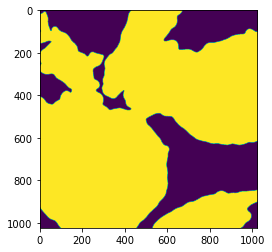

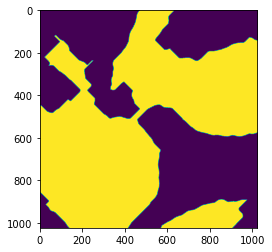

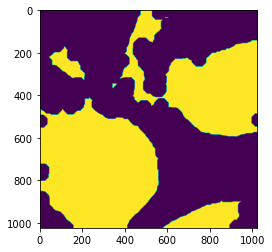

Point2307_pt2001_20680_Normal


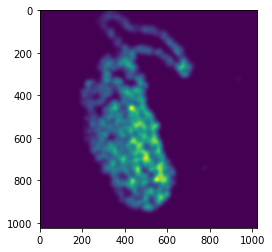

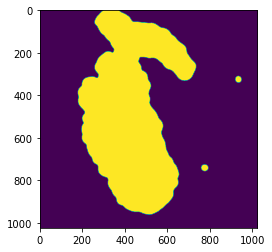

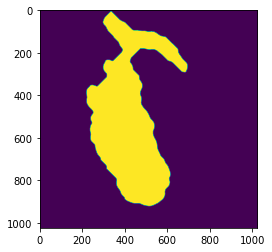

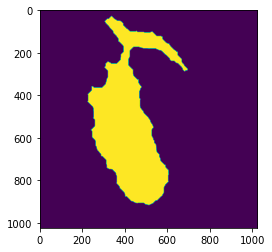

Point2309_pt1039_20694


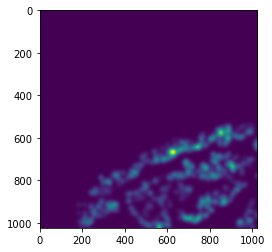

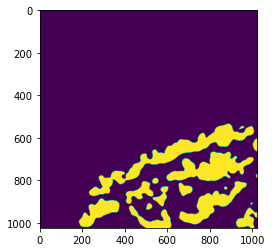

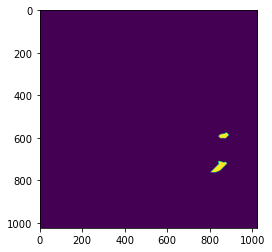

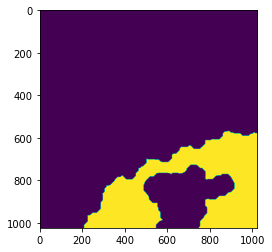

Point2310_pt1052_20696


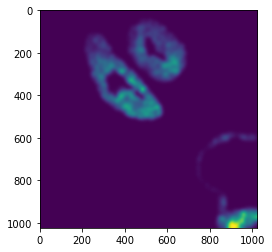

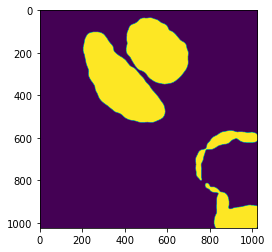

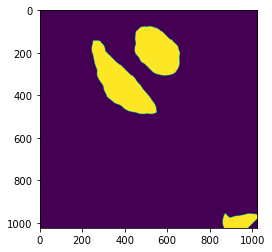

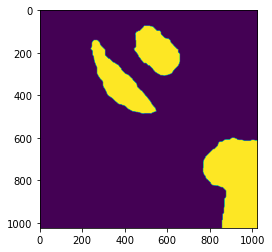

Point2311_pt1053_20698


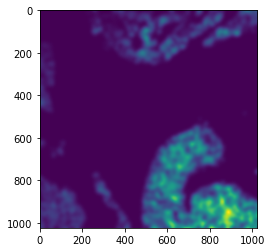

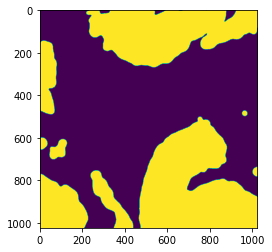

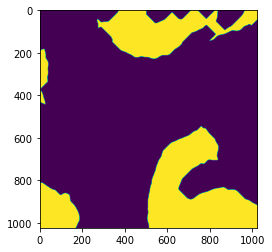

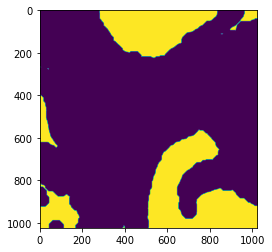

Point2312_pt1064_20700


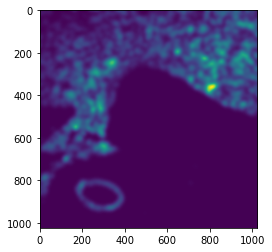

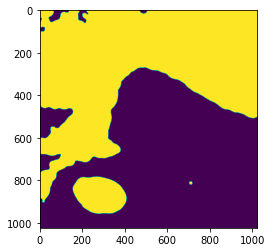

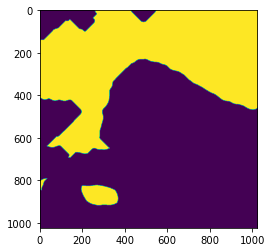

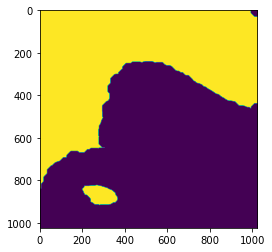

Point2313_pt1094_20702


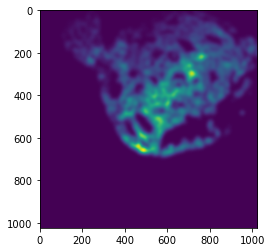

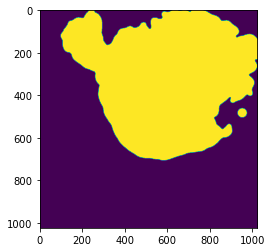

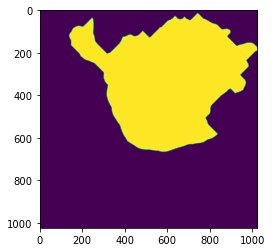

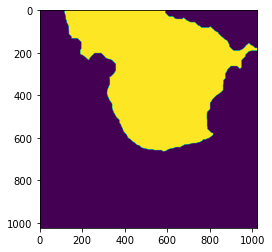

Point2314_pt2002_20703_Normal


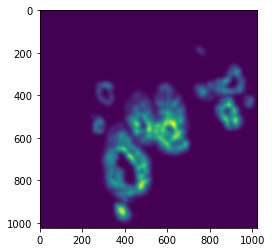

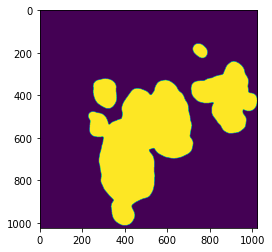

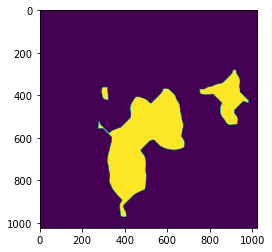

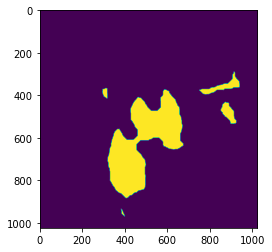

Point2318_pt1054_20706


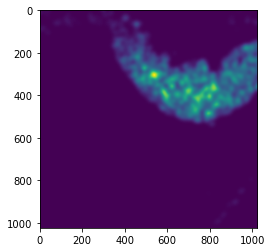

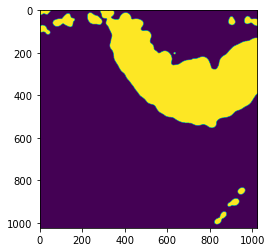

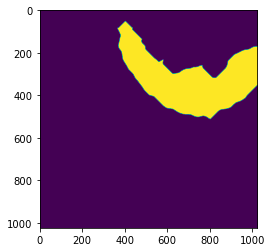

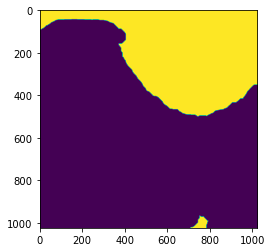

Point2319_pt1041_20705


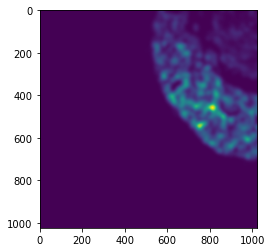

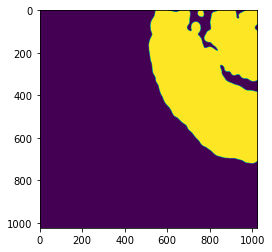

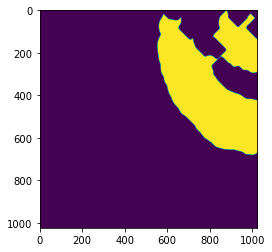

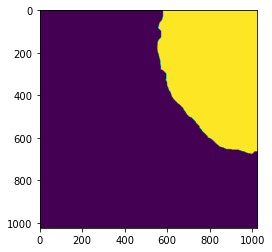

Point2320_pt1042_20716


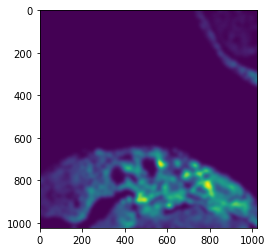

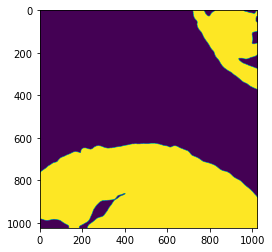

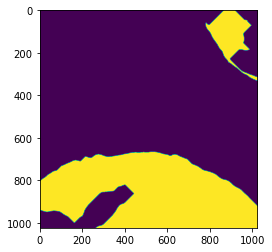

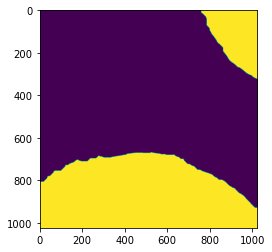

Point2321_pt1043_20717


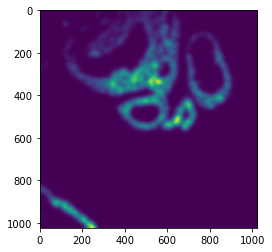

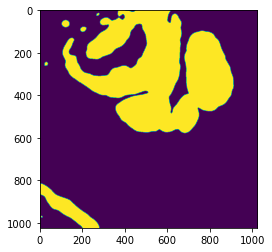

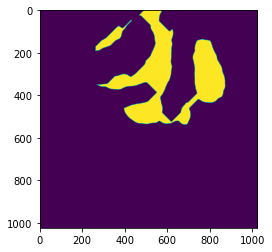

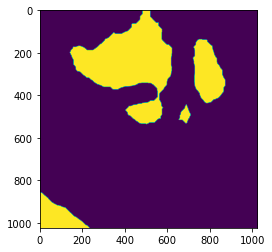

Point2322_pt1057_20718


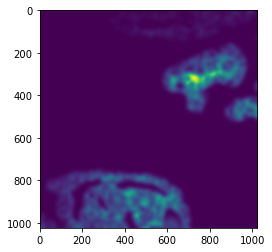

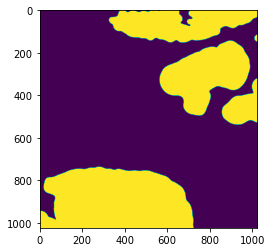

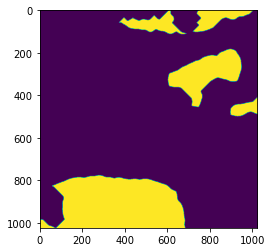

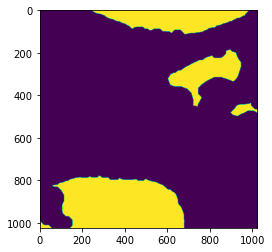

Point2324_pt2003_20721_Normal


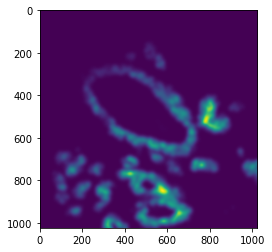

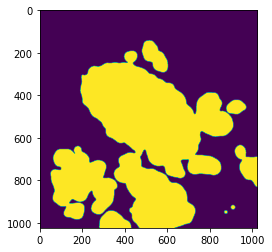

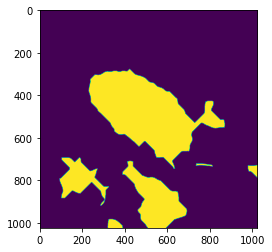

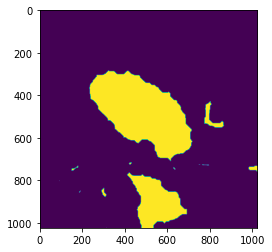

Point2325_pt1461_20726


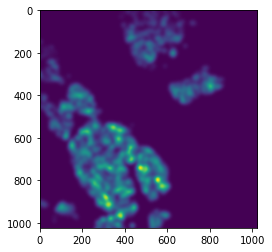

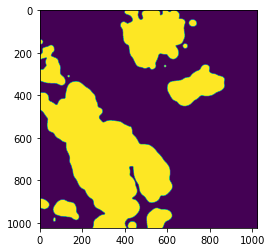

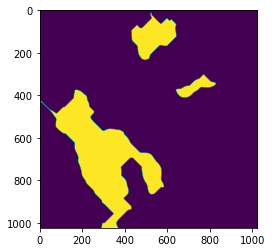

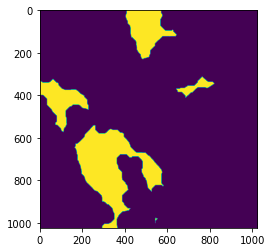

Point2326_pt1101_20736


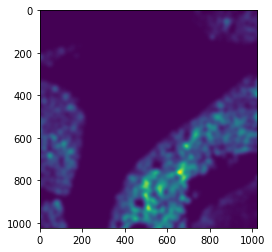

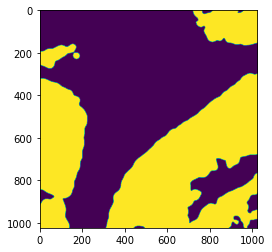

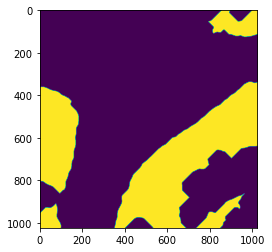

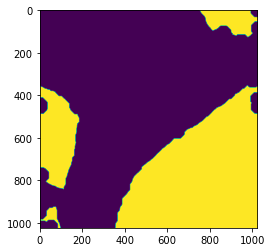

Point2327_pt1100_20735


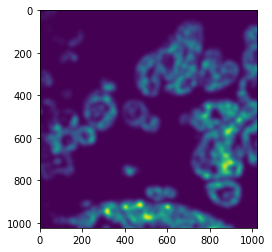

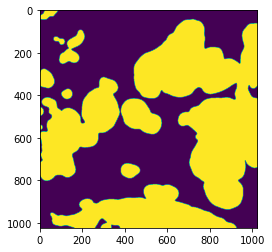

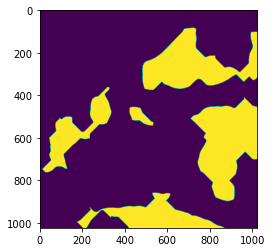

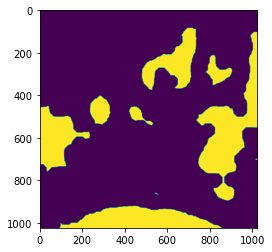

Point2328_pt1099_20734


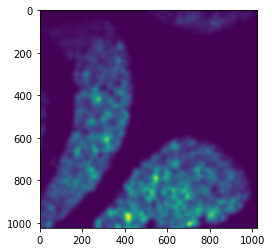

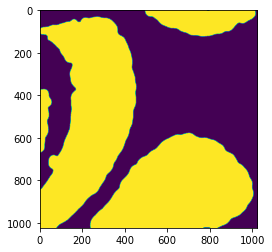

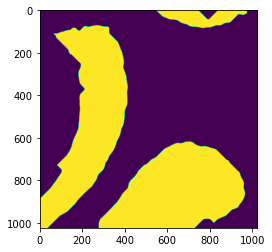

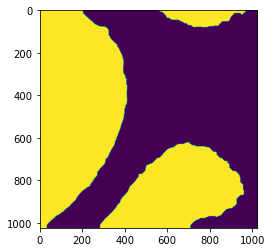

Point2331_pt1105_30985


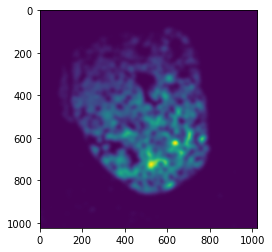

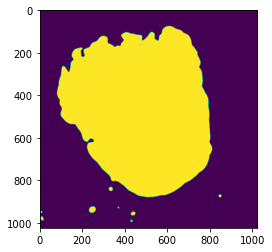

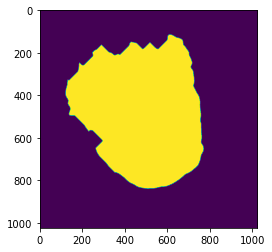

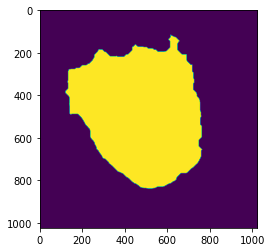

Point3102_pt1157_31646


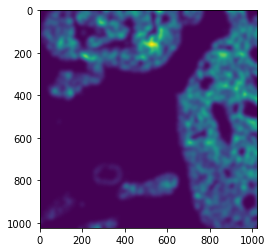

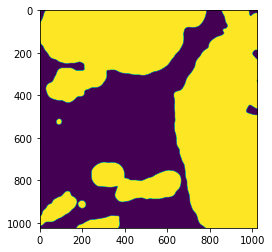

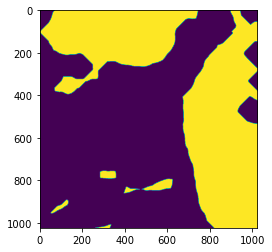

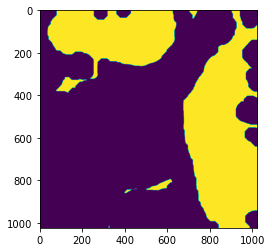

Point3104_pt1175_31649


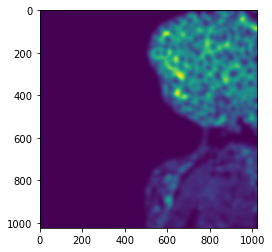

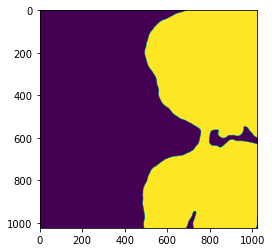

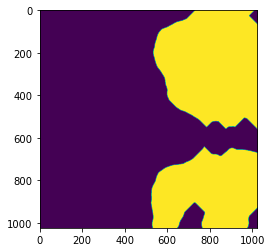

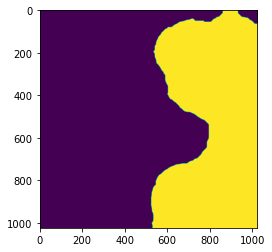

Point3105_pt1173_31661


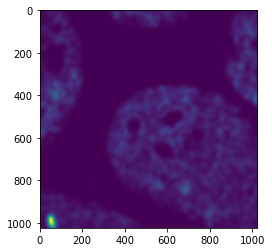

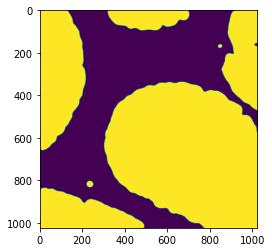

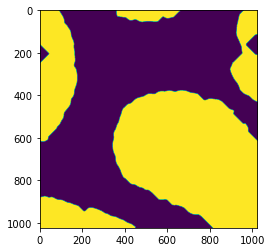

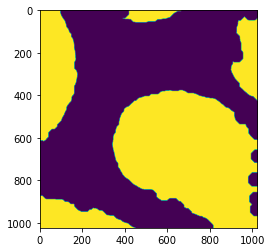

Point3107_pt1188_31663


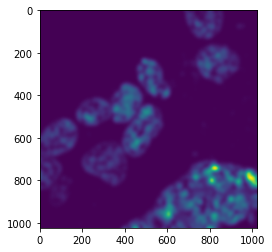

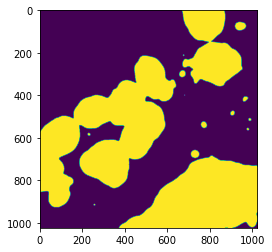

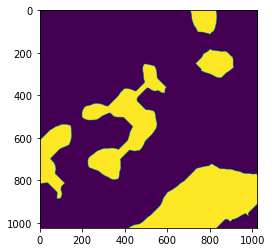

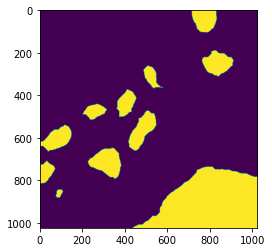

Point3108_pt1189_31664


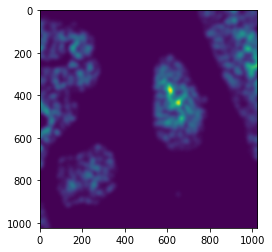

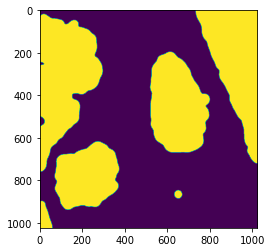

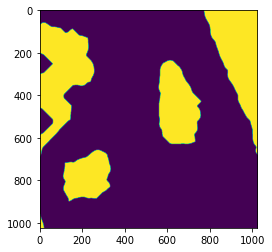

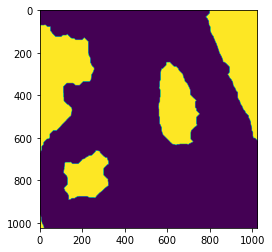

Point3109_pt2004_31653_Normal


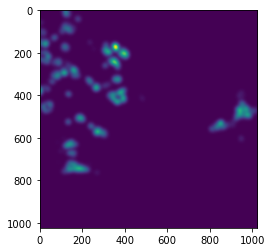

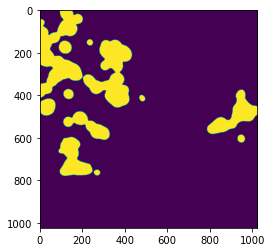

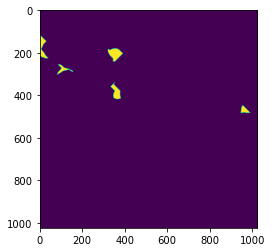

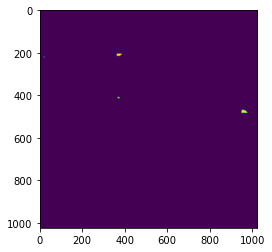

Point3110_pt1078_31655


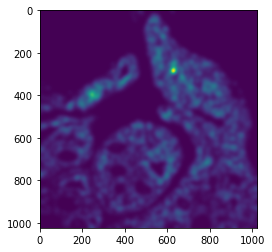

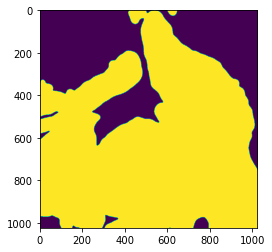

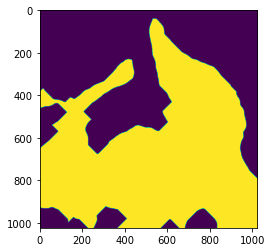

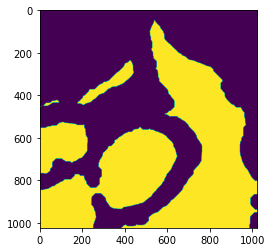

Point3111_pt1119_31659


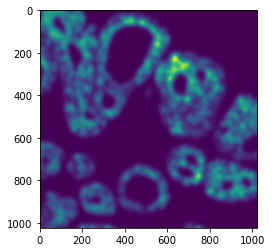

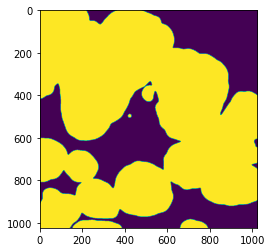

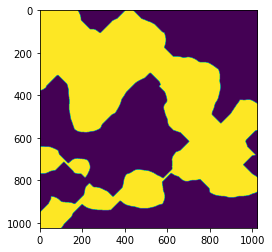

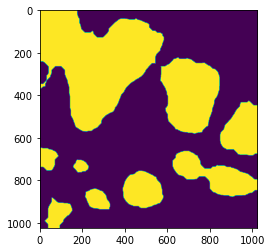

Point3112_pt1165_31672


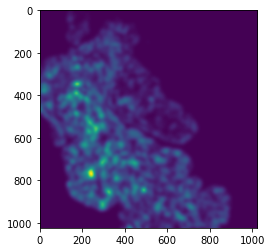

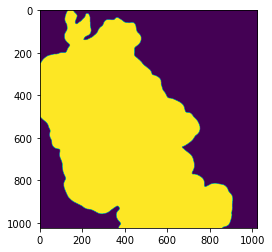

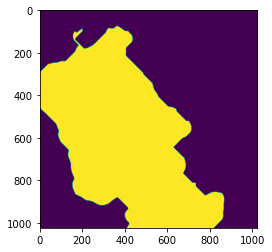

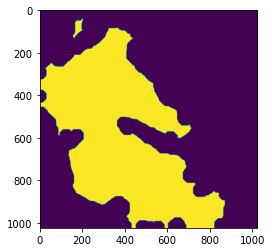

Point3114_pt1081_31667


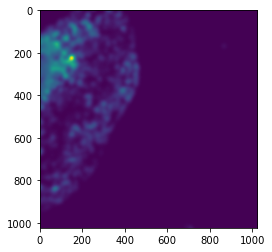

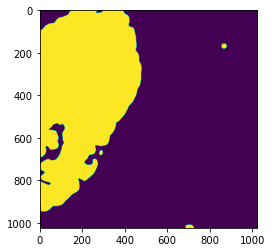

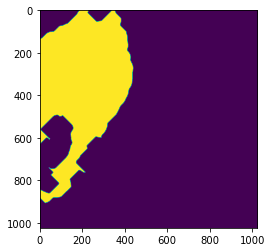

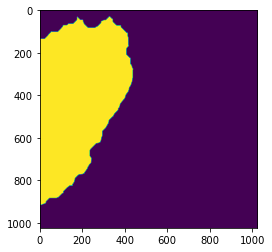

Point3115_pt1080_31666


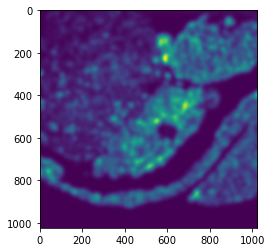

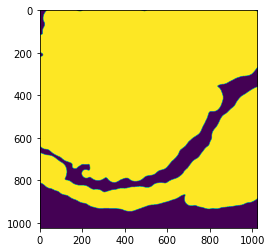

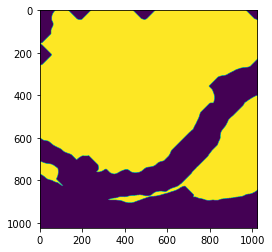

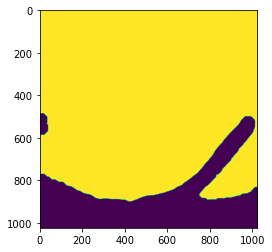

Point3117_pt1082_31677


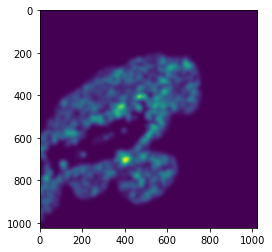

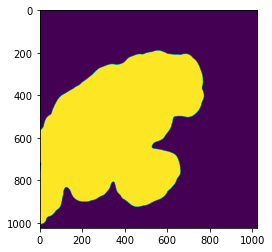

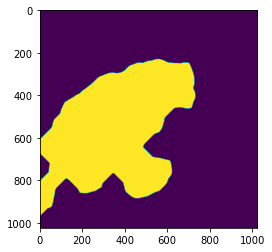

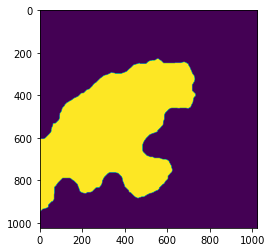

Point3119_pt1166_31684


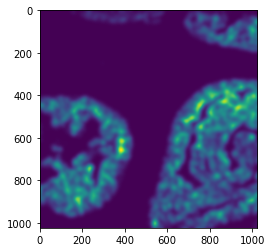

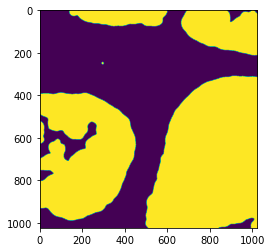

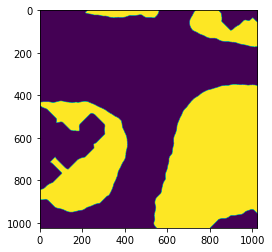

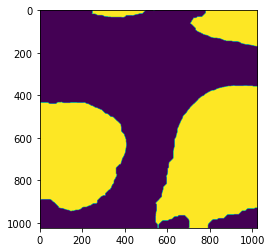

Point3120_pt1177_31685


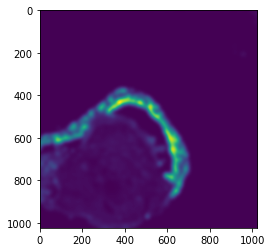

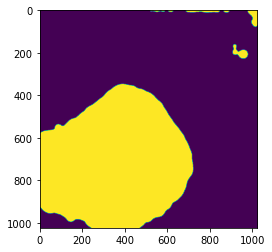

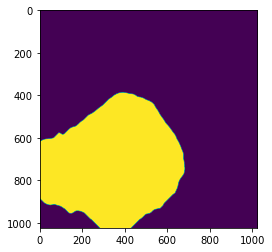

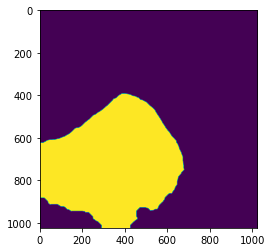

Point3121_pt1211_31686


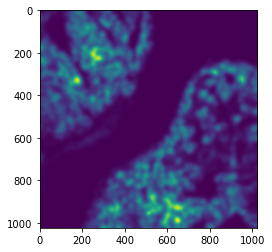

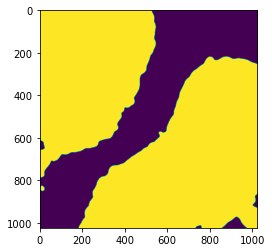

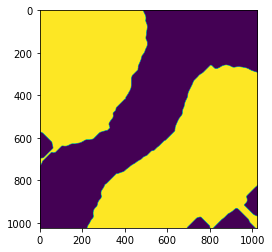

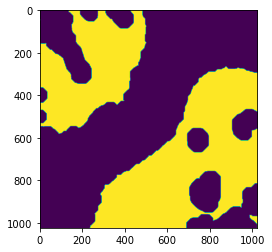

Point3123_pt1162_31688


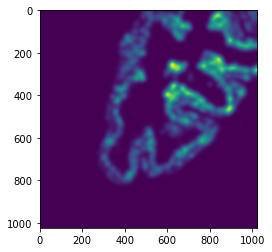

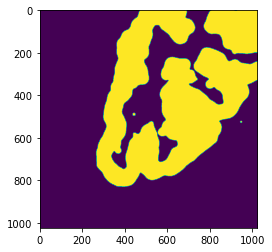

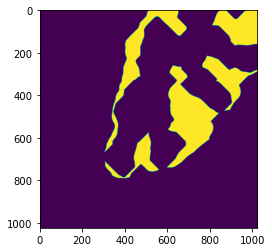

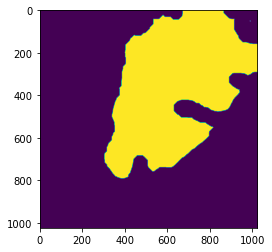

Point3125_pt1167_31695


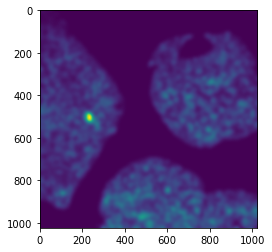

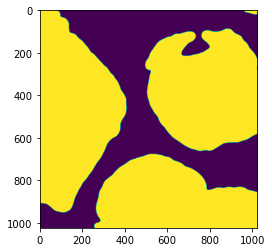

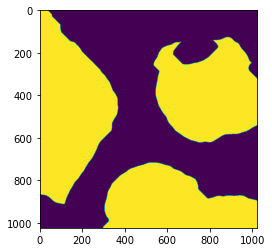

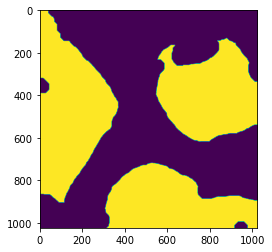

Point3128_pt1085_31690


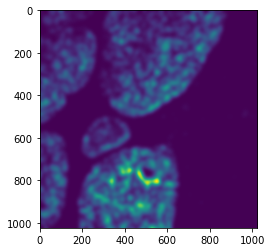

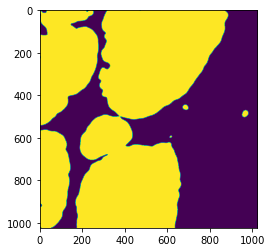

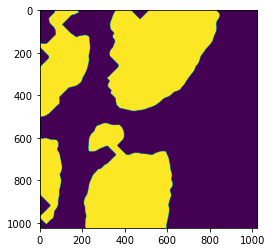

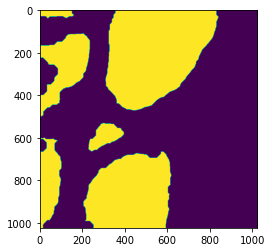

Point3129_pt1084_31689


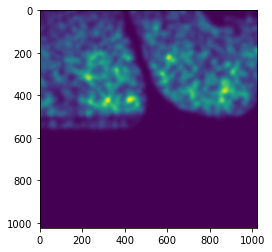

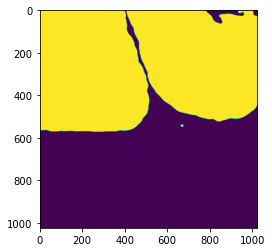

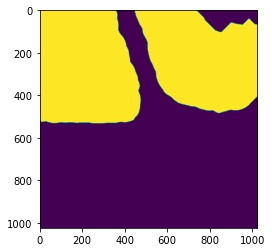

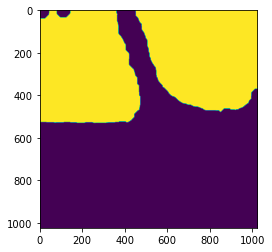

Point3201_31724_Tonsil


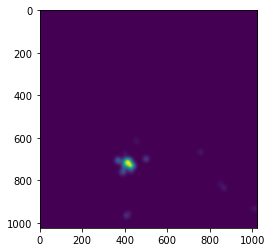

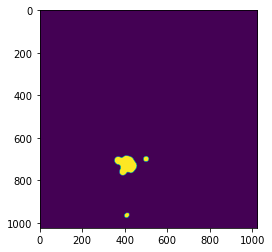

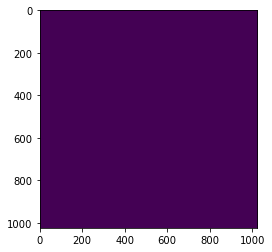

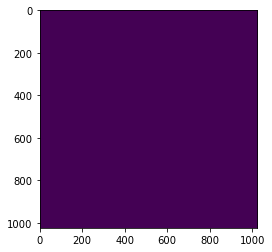

Point4102_pt2005_30990_Normal


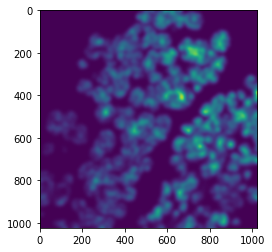

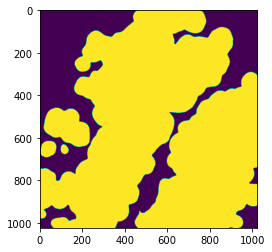

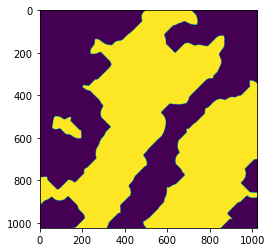

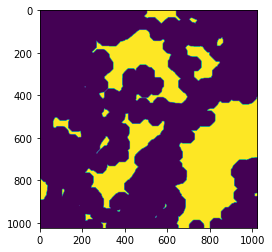

Point4103_pt1173_30993


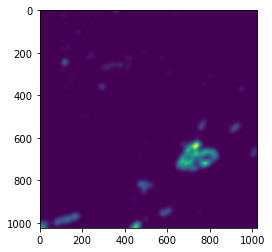

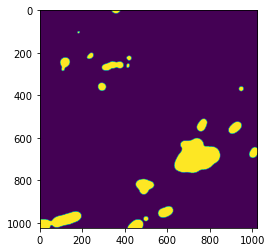

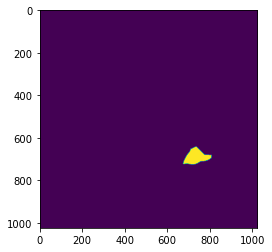

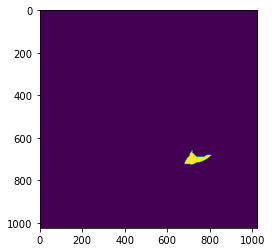

Point4106_pt1162_30997


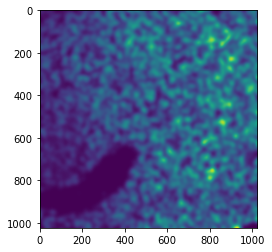

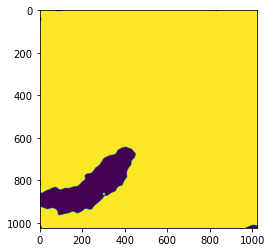

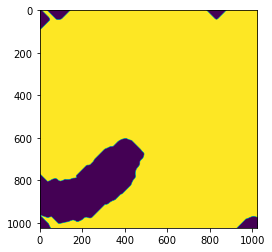

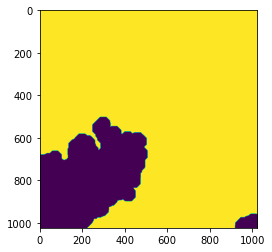

Point4114_pt2006_31801_Normal


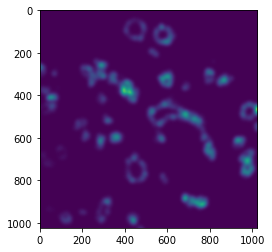

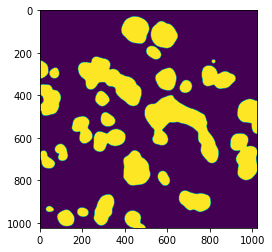

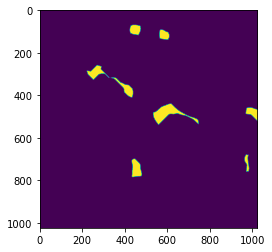

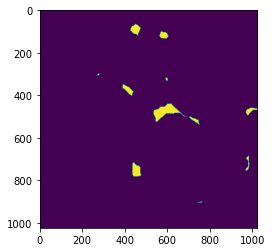

Point4115_pt1107_31817


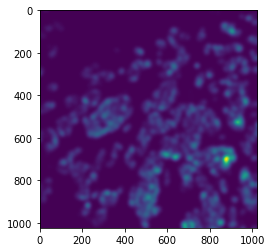

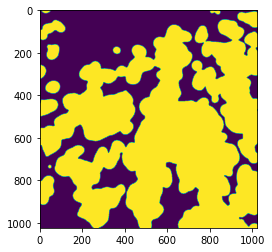

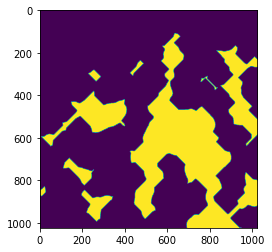

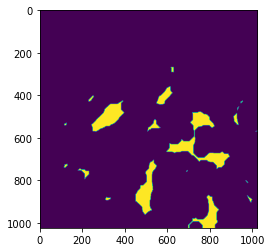

Point4116_pt1065_31821


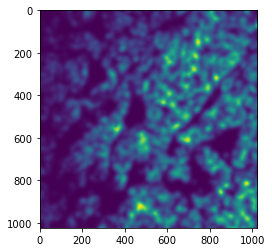

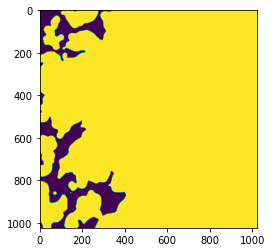

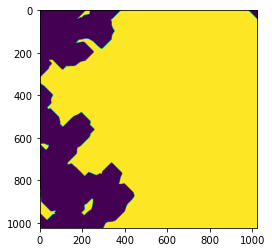

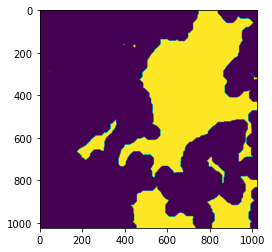

Point4117_pt1143_31822


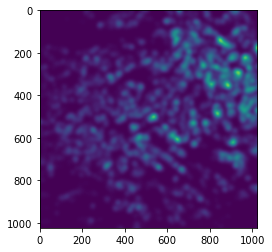

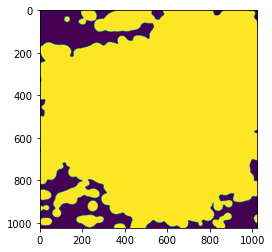

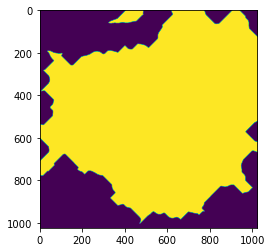

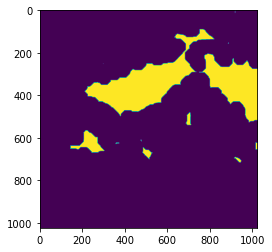

Point4118_pt2007_31824_Normal


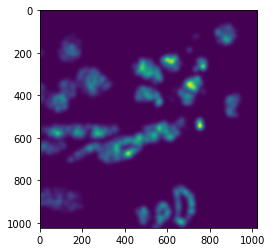

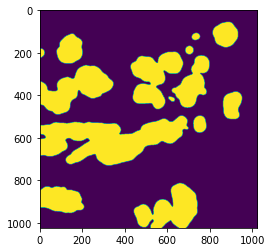

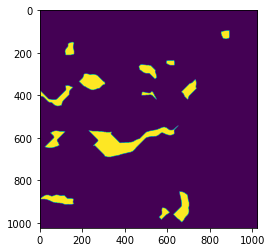

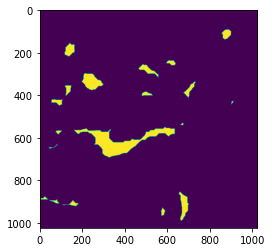

Point4120_pt1153_31832


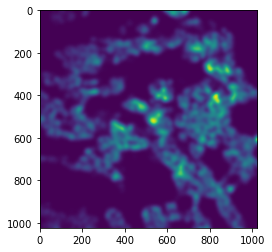

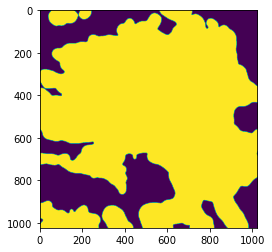

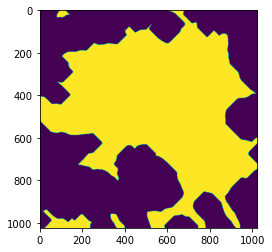

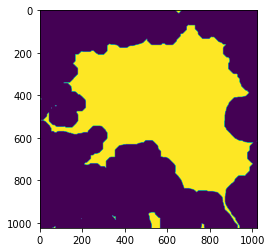

Point4127_pt1052_31842


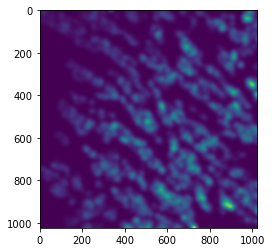

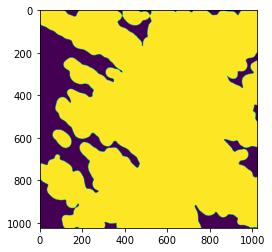

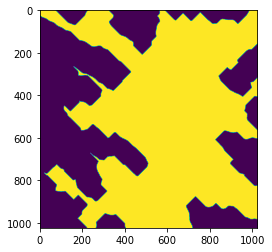

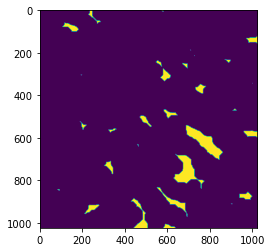

Point4128_pt1064_31843


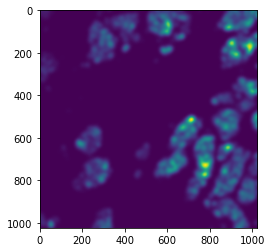

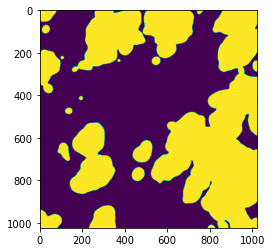

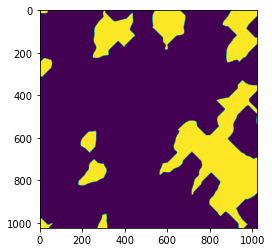

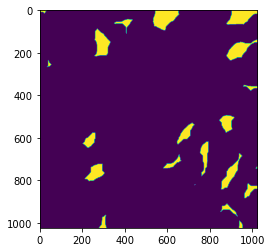

Point4130_pt1057_31848


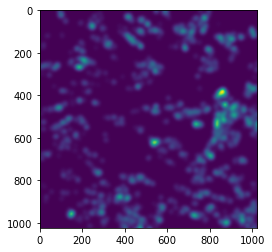

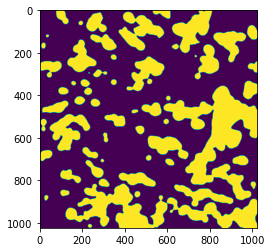

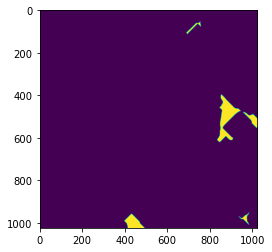

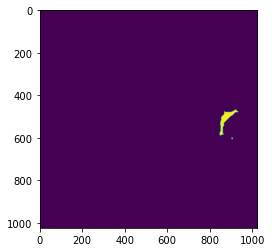

Point4132_pt1026_31856


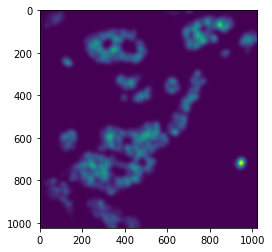

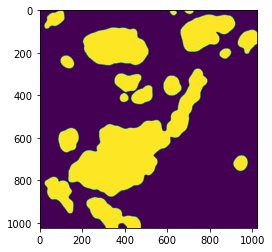

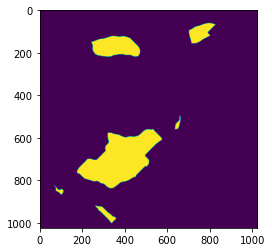

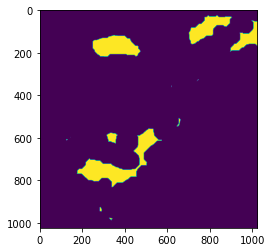

Point4133_pt1027_31855


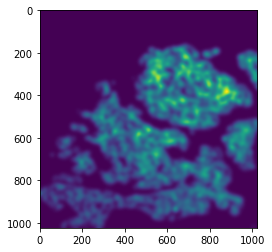

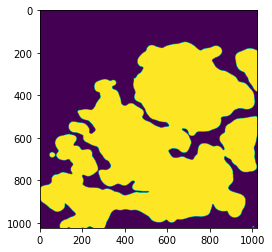

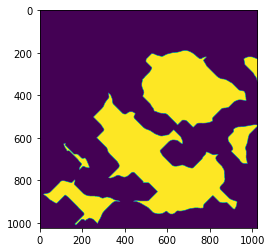

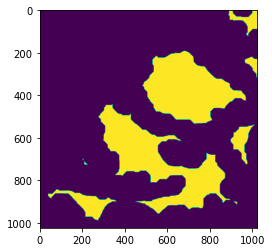

Point4136_pt1058_31850


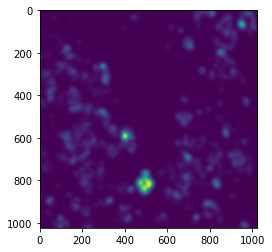

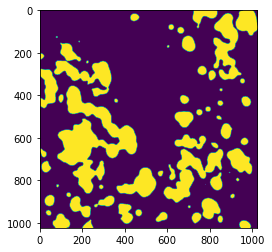

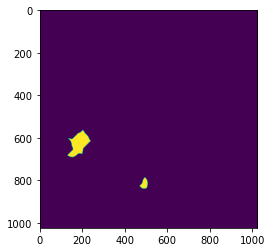

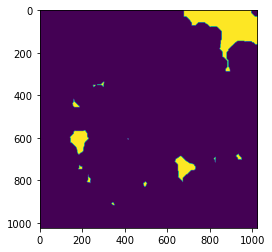

Point4142_pt2008_Normal


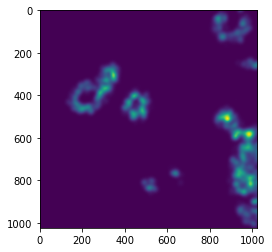

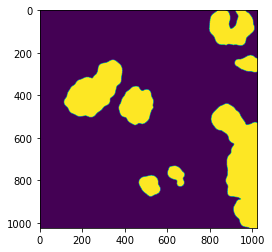

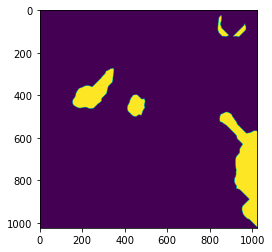

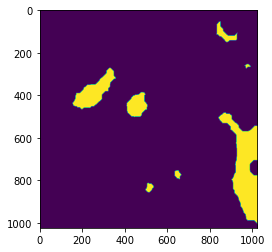

Point4410_pt1181_31721


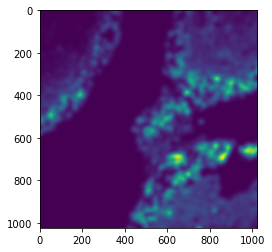

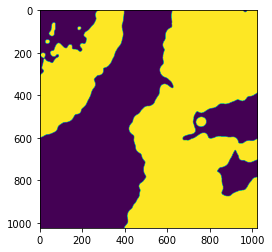

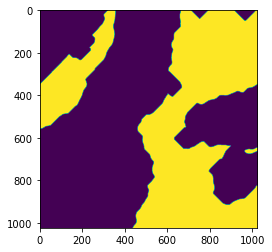

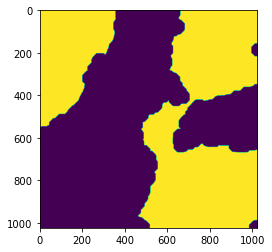

Point4411_pt1180_31720


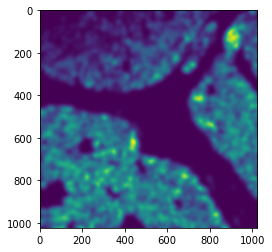

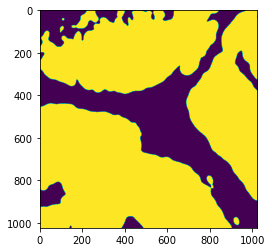

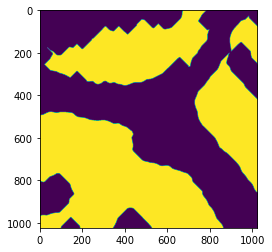

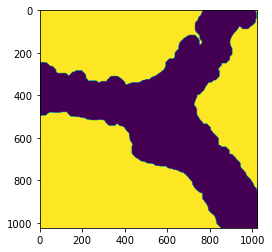

Point5202_pt1279_20662


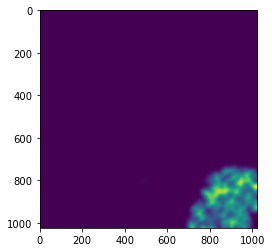

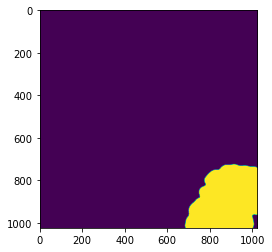

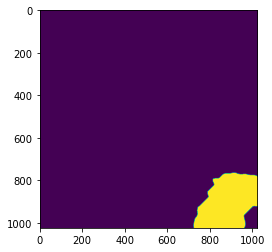

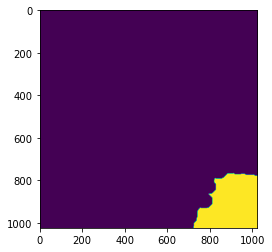

Point5302_pt1070_31594


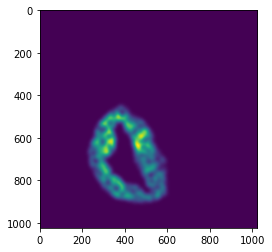

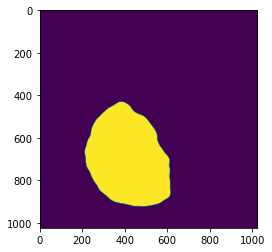

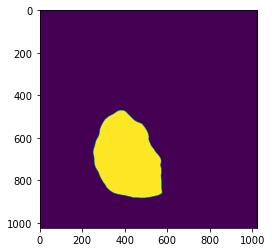

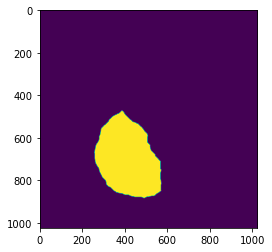

Point5303_pt1153_31614


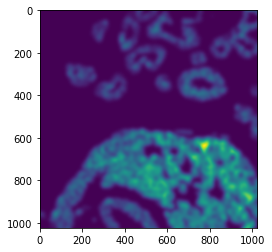

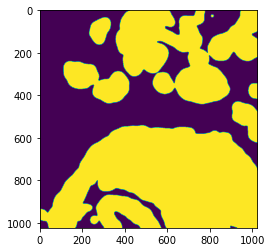

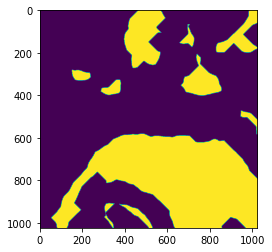

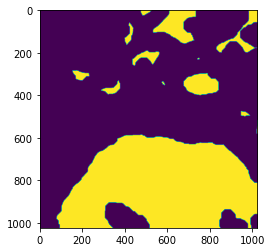

Point5304_pt1152_31613


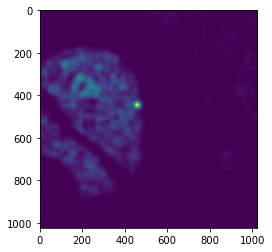

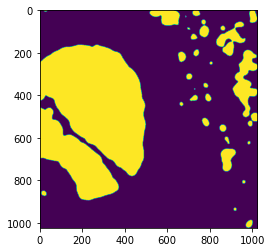

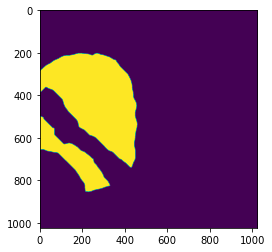

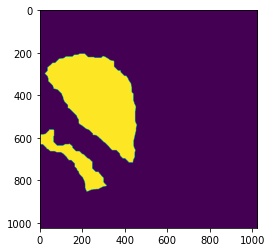

Point5305_pt1117_31627


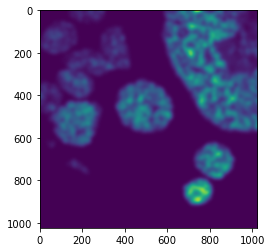

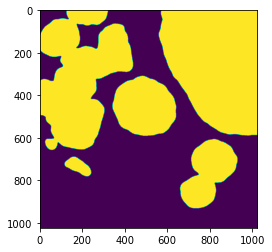

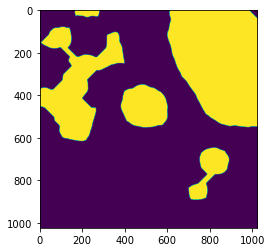

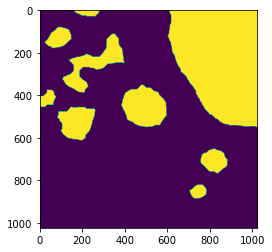

Point5306_pt1132_31624


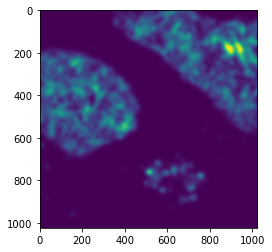

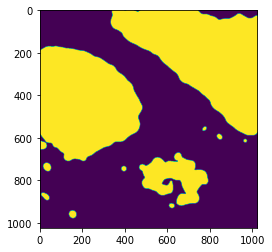

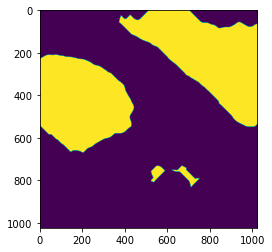

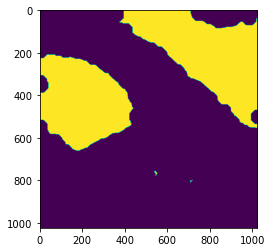

Point5308_pt1074_31629


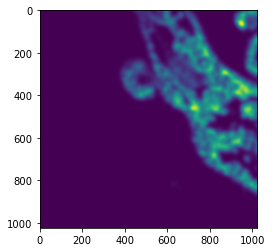

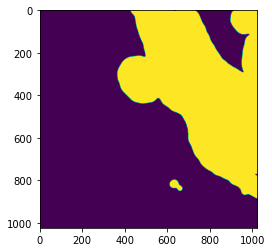

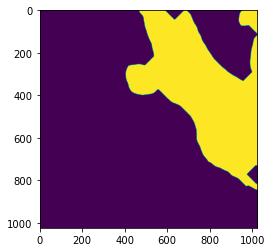

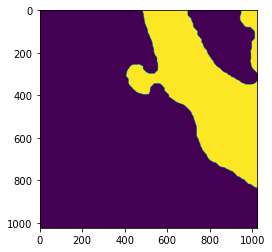

Point5309_pt1134_31636


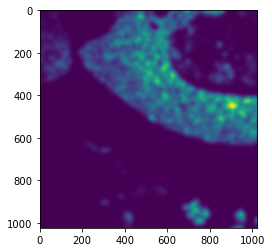

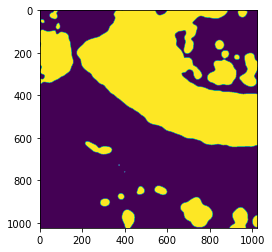

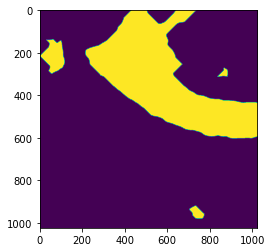

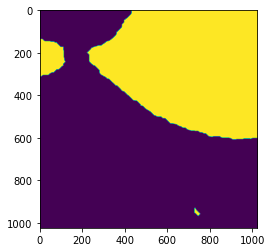

Point5310_pt1174_31638


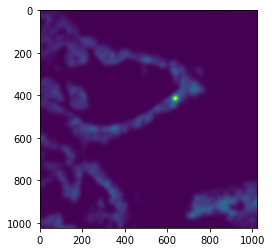

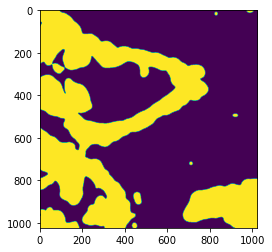

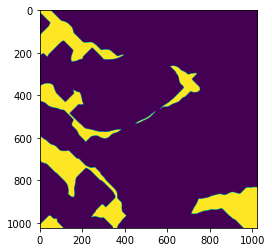

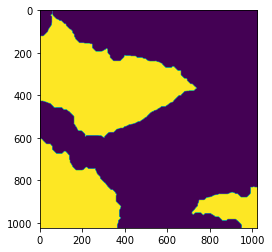

Point5311_31640_Tonsil


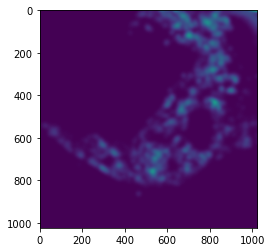

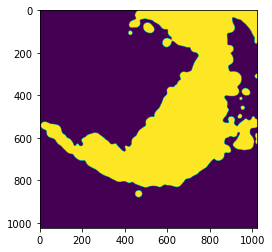

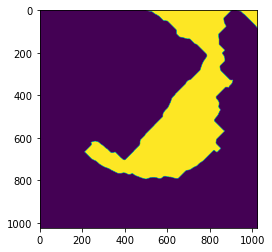

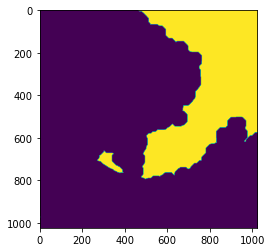

Point6102_pt1019_20648


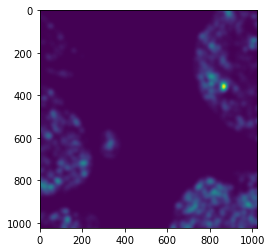

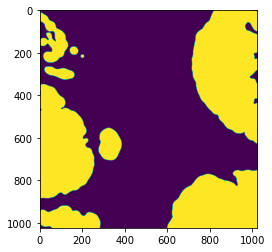

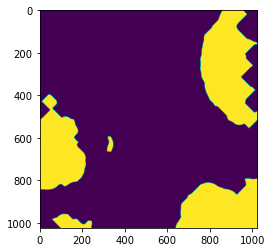

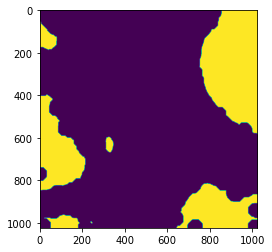

Point6103_pt1008_20624


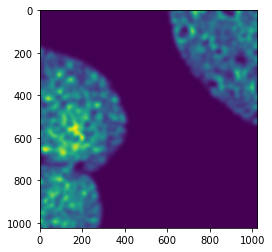

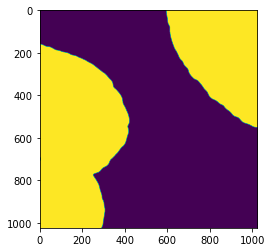

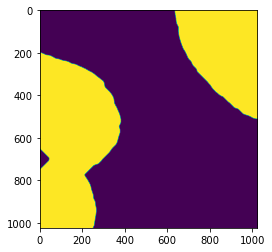

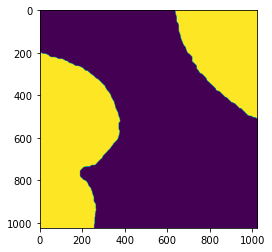

Point6201_pt1027_20597


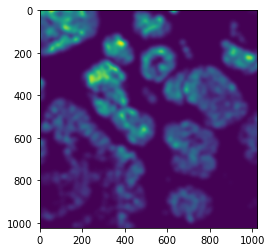

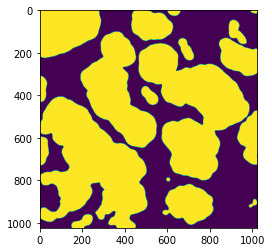

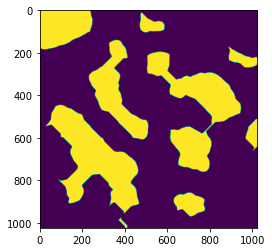

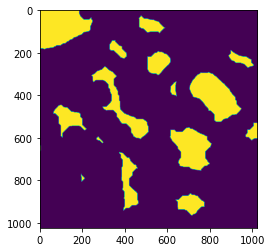

Point6202_pt1027_20594


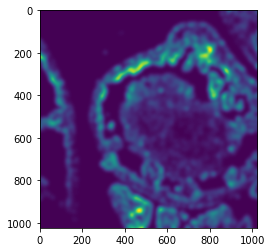

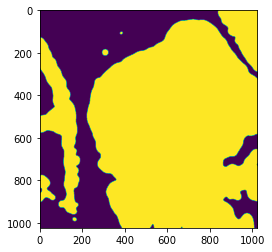

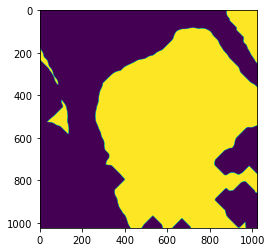

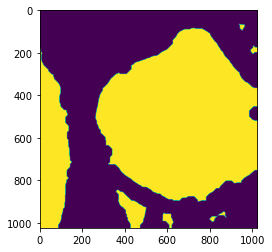

Point6203_pt1107_31568


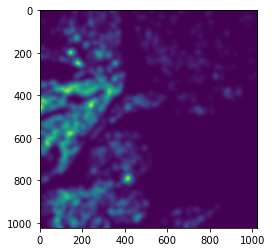

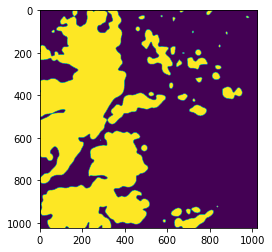

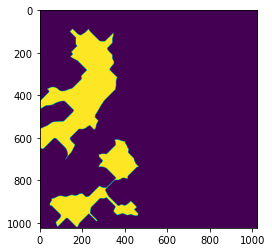

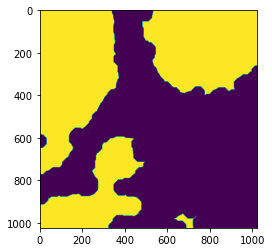

Point6204_pt1145_31580


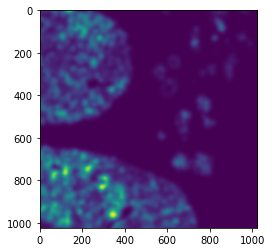

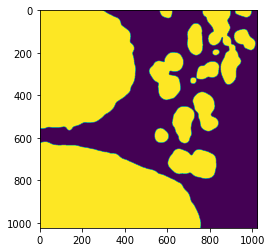

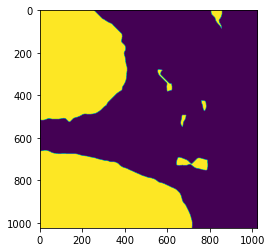

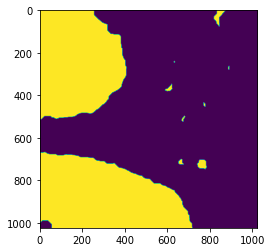

Point6206_pt1197_31571


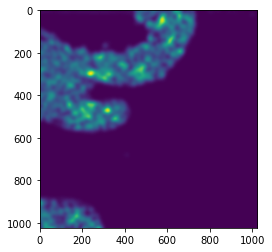

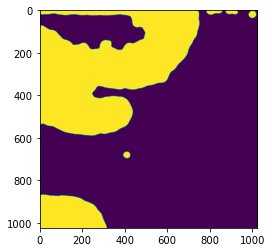

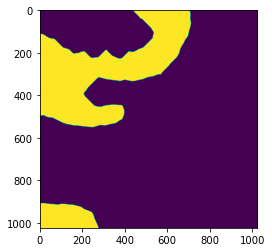

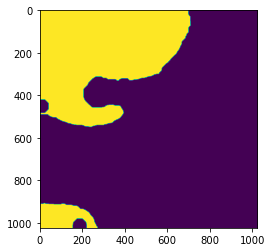

In [221]:
for fp, mask_fp in zip(fps, mask_fps):
    print(fp.split('/')[-3])
    img = tifffile.imread(fp)
#     plt.imshow(img)
#     plt.show()
    
    f = gaussian(img, sigma=10.)
    plt.imshow(f)
    plt.show()
    
    mask = f > .0005
    mask = binary_fill_holes(mask)
#     mask = binary_dilation()
    plt.imshow(mask)
    plt.show()
    for i in range(40):
        mask = binary_erosion(mask)
    mask = binary_fill_holes(mask)
    mask = remove_small_objects(mask, min_size=25)
    plt.imshow(mask)
    plt.show()
    
    mask = np.asarray(Image.open(mask_fp))
    plt.imshow(mask)
    plt.show()

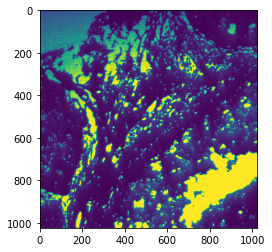

In [163]:
img = tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2326_pt1101_20736/TIFs/Au.tif')
plt.imshow(img)

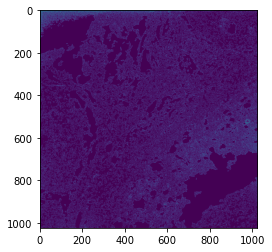

In [164]:
img = tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2326_pt1101_20736/TIFs/Background.tif')
plt.imshow(img)


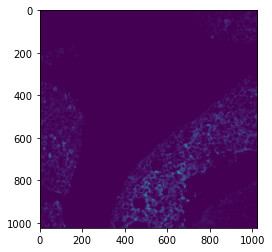

In [185]:
img = tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2326_pt1101_20736/TIFs/PanKRT.tif')
plt.imshow(img)

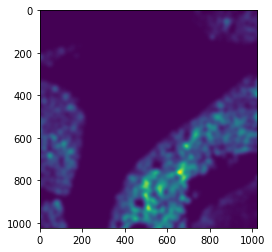

In [186]:
f = gaussian(img, sigma=10.)
plt.imshow(f)

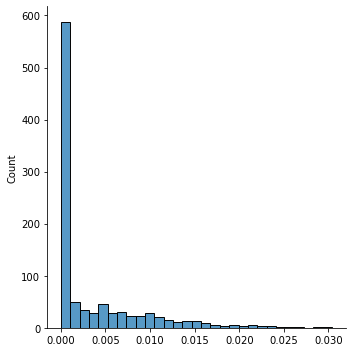

In [192]:
sns.displot(np.random.choice(f.flatten(), 1000))

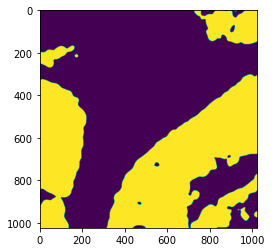

In [195]:
plt.imshow(f > .001)

In [174]:
fps = [
    '/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2326_pt1101_20736/TIFs/PanKRT.tif'
#     '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT323B1-H3/level_2/stitched/reg001_cyc004_ch002_Pan-CK.tif',
#     '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_2/stitched/reg001_cyc004_ch002_Pan-CK.tif',
#     '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_2/stitched/reg001_cyc002_ch003_E-cadherin.tif',
]
img = np.asarray([tifffile.imread(fp) for fp in fps])
img = img.mean(axis=0)
# img = (
#     tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1_H1_06252022/level_2/stitched/reg001_cyc004_ch002_Pan-CK.tif') + tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1-H1/level_2/stitched/reg001_cyc002_ch003_E-cadherin.tif')) / 2.
img.shape

(1024, 1024)

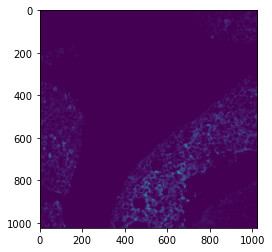

In [175]:
# small = img[5000:6000, 5000:6000]
small = img
plt.imshow(small)

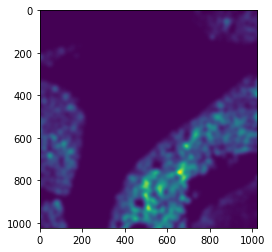

In [177]:
f = gaussian(small, sigma=10.)
plt.imshow(f)

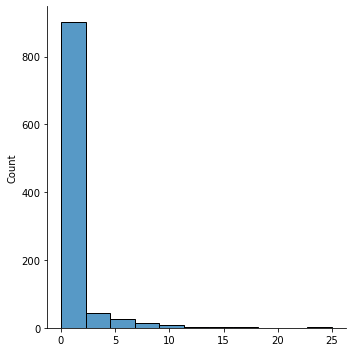

In [178]:
sns.displot(np.random.choice(small.flatten(), 1000))

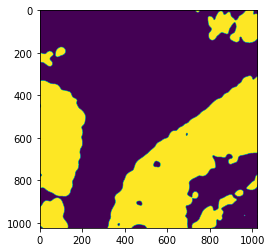

In [181]:
plt.imshow(f > .5)

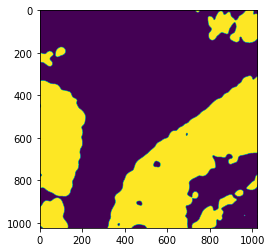

In [179]:
mask = np.zeros_like(f, dtype=bool)
mask[f>.5] = True
plt.imshow(mask)

In [157]:
from scipy.ndimage import binary_fill_holes

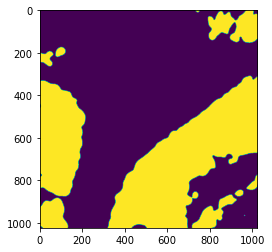

In [158]:
plt.imshow(binary_fill_holes(mask))

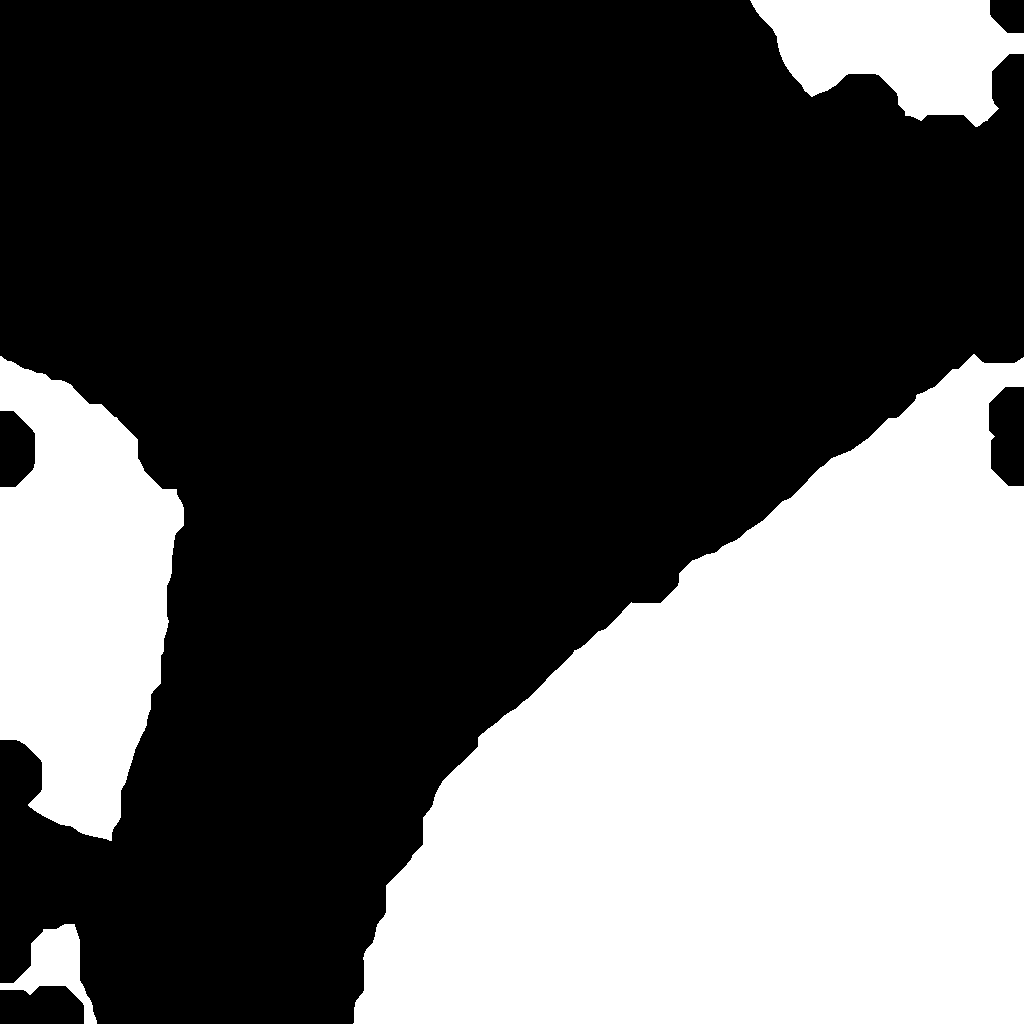

In [198]:
from PIL import Image
mask = Image.open('/diskmnt/Projects/Users/estorrs/multiplex_data/mibi/angelo/d87vg86zd8-3/Image_Data/raw_tifs_masks/Point2326_pt1101_20736/duct_mask.tif')
mask

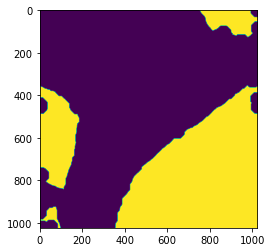

In [200]:
plt.imshow(np.asarray(mask))

In [127]:
f = gaussian(img, sigma=5.)

In [128]:
mask = np.zeros_like(f, dtype=bool)
mask[f>500] = True

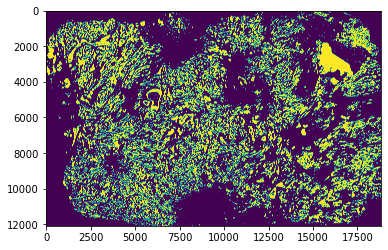

In [129]:
plt.imshow(mask)

In [130]:
filled = binary_fill_holes(mask)

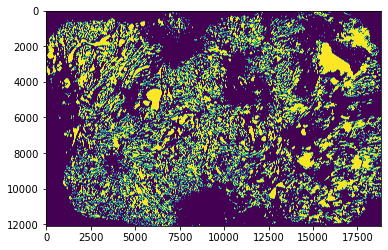

In [131]:
plt.imshow(filled)

In [132]:
tifffile.imwrite('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT323B1-H3/level_3/annotations/tumor_mask_05_alpha.tif',
                data=filled)

In [ ]:
tifffile.imwrite('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1-H1/level_3/annotations/tumor_blurred.tif',
                data=f)

In [10]:
tifffile.imwrite('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1-H1/level_3/annotations/tumor_blurred.tif',
                data=f)

In [4]:

clf = tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_3/annotations/tumor.ome.tif')


In [5]:
clf.shape

(15120, 13440)

In [6]:
set(clf[:5000].flatten())

{0, 1}

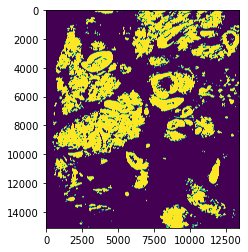

In [8]:
plt.imshow(clf)

In [13]:
holes = tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_3/annotations/tumor_holes.ome.tif')


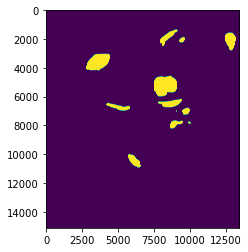

In [14]:
plt.imshow(holes)

In [15]:
np.unique(holes)

array([0, 1], dtype=uint8)

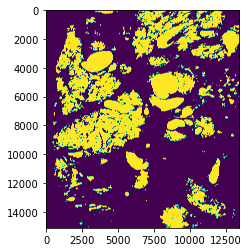

In [16]:
plt.imshow(holes | clf)

In [17]:
tifffile.imwrite('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_3/annotations/tumor.tif',
                data=holes | clf)